**<h1>INTRODUCTION</h1>**
I visualized the Donor Dataset using matplotlib and seaborn.
* Peek at the Data
* Explanation of Features
* Identification and Filling of Missing Values
* Categorical and Numeric Columns
* Exploring the relationship between the Categorical and the Target Column
* Exploring the relationship between the Numerical and the Target Column
* Modelling and Prediction
* Cross validation to avoid overfitting


In [1]:
# libraries for analysis and visualisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
sns.set()
cmap = cm.get_cmap('Spectral')

# libraries for modelling
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score,log_loss,roc_auc_score
from scipy.stats import mode
from sklearn.model_selection import train_test_split, KFold

# `Dataset description`
* CARD_PROM_12 - Number of card promotions received in the last 12 months

* CLUSTER_CODE - 54 socio-economic cluster codes
* CONTROL_NUMBER- The control number uniquely identifies each member of the analysis population

* DONOR_AGE - Age as of June 1997
* DONOR_GENDER - Actual or inferred gender
* FILE_AVG_GIFT - Average gift from raw data
* FILE_CARD_GIFT - Average card gift from raw data
* FREQUENCY_STATUS-97NK - Frequency status as of June 1997
* HOME_OWNER - H=Homeowner ,U=Unknown
* INCOME_GROUP - 7 income group levels
* IN_HOUSE - A final field identifies donors who are part of the organization's In House program
* LAST_GIFT_AMT - Amount of most recent donation
* LIFETIME_AVG_GIFT_AMT - Overall average gift amount
* LIFETIME_CARD_PROM - Total number of card promotions received
* LIFETIME_GIFT_AMOUNT - Total gift amount given
* LIFETIME_GIFT_COUNT - Total number donations given
* LIFETIME_GIFT_RANGE - Maximum less minimum gift amount
* LIFETIME_MAX_GIFT_AMT - Maximum gift amount
* LIFETIME_MIN_GIFT_AMT - Minimum gift amount

* LIFETIME_PROM - Total number of promotions received
* MEDIAN_HOME_VALUE - Median home value in 100's
* MEDIAN_HOUSEHOLD_INCOME -  Median household income in 100's
* MONTHS_SINCE_FIRST_GIFT - First donation date from June 1997
* MONTHS_SINCE_LAST_GIFT - Last donation date from June 1997
* MONTHS_SINCE_LAST_PROM_RESP - Number of months since donor has responded to a promotion date from June 1997
* MONTHS_SINCE_ORIGIN - This number is derived from MONTHS_SINCE_FIRST
* MOR_HIT_RATE - Total number of known times the donor has responded to a mail order offer other than the national charitable    organization's.
* NUMBER_PROM_12 - Number of promotions received in the last 12 months
* OVERLAY_SOURCE - M=Metromail ,P=Polk, B=Both
* PCT_ATTRIBUTE1 - Percent with attribute1 in the block
* PCT_ATTRIBUTE2 - Percent with attribute2 in the block
* PCT_ATTRIBUTE3 - Percent with attribute3 in the block
* PCT_ATTRIBUTE4 - Percent with attribute4 in the block
* PCT_OWNER_OCCUPIED - Percent of owner-occupied housing
* PEP_STAR STAR-status ever (1=yes, 0=no)
* PER_CAPITA_INCOME - Per capita income in dollars
* PUBLISHED_PHONE - Indicator of presence of published telephone listing
* RECENCY_STATUS_96NK - Recency status as of June 1996
* RECENT_AVG_CARD_GIFT_AMT - Average gift amount to card promotions since June 1994
* RECENT_AVG_GIFT_AMT - Average gift amount since June 1994
* RECENT_CARD_RESPONSE_COUNT - Response count since June 1994
* RECENT_CARD_RESPONSE_PROP - Response proportion since June 1994
* RECENT_RESPONSE_COUNT - Response count since June 1994
* RECENT_RESPONSE_PROP - Response proportion since June 1994
* RECENT_STAR_STATUS STAR (1,0) status since June 1994
* SES 5 - socio-economic cluster codes
* TARGET_B - Response to 97NK solicitation (1=yes, 0=no)
* TARGET_D - Response amount to 97NK solicitation (missing if no response)
* URBANICITY - U=Urban ,C=City, S=Suburban , T=Town ,R=Rural ,?=Unknown
* WEALTH_RATING - 10 wealth rating groups




In [2]:
training_data = pd.read_csv('Donor Raw Data_ML with Python.csv')
test_data = pd.read_csv('Prospective Donor_ML with Python.csv')

**Checking the number of features in the datasets**

In [3]:
print("\nTraining Set :",'-' *10,len(training_data.columns))
print("\nTest Set     :",'-' *10,len(test_data.columns))


Training Set : ---------- 50

Test Set     : ---------- 48


**Checking the number of observations in the datasets**

In [4]:
print("\nTraining Set :",'-' *10,len(training_data))
print("\nTest Set     :",'-' *10,len(test_data))


Training Set : ---------- 19372

Test Set     : ---------- 2148


In [5]:
# a peek at the data
training_data.head()

TARGET_B  TARGET_D  CONTROL_NUMBER  MONTHS_SINCE_ORIGIN  DONOR_AGE  \
0         0       NaN               5                  101       87.0   
1         1      10.0              12                  137       79.0   
2         0       NaN              37                  113       75.0   
3         0       NaN              38                   92        NaN   
4         0       NaN              41                  101       74.0   

   IN_HOUSE URBANICITY SES CLUSTER_CODE HOME_OWNER  ... LIFETIME_GIFT_RANGE  \
0         0          ?   ?            .          H  ...                15.0   
1         0          R   2           45          H  ...                20.0   
2         0          S   1           11          H  ...                23.0   
3         0          U   2            4          H  ...                14.0   
4         0          R   2           49          U  ...                20.0   

   LIFETIME_MAX_GIFT_AMT  LIFETIME_MIN_GIFT_AMT LAST_GIFT_AMT  CARD_PROM_12  \
0                   20.0                    5.0          15.0             5   
1                   25.0                    5.0          17.0             7   
2                   28.0                    5.0          19.0            11   
3                   17.0                    3.0          15.0            11   
4                   25.0                    5.0          25.0             6   

   NUMBER_PROM_12  MONTHS_SINCE_LAST_GIFT  MONTHS_SINCE_FIRST_GIFT  \
0              12                      26                       92   
1              21                       7                      122   
2              32                       6                      105   
3              33                       6                       92   
4              19                      18                       92   

   FILE_AVG_GIFT  FILE_CARD_GIFT  
0           8.49               7  
1          14.72              12  
2          16.75              16  
3          11.76              12  
4           8.83               3  

[5 rows x 50 columns]

In [6]:
# getting an overview of the data
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     19372 non-null  int64  
 1   TARGET_D                     4843 non-null   float64
 2   CONTROL_NUMBER               19372 non-null  int64  
 3   MONTHS_SINCE_ORIGIN          19372 non-null  int64  
 4   DONOR_AGE                    14577 non-null  float64
 5   IN_HOUSE                     19372 non-null  int64  
 6   URBANICITY                   19372 non-null  object 
 7   SES                          19372 non-null  object 
 8   CLUSTER_CODE                 19372 non-null  object 
 9   HOME_OWNER                   19372 non-null  object 
 10  DONOR_GENDER                 19372 non-null  object 
 11  INCOME_GROUP                 14980 non-null  float64
 12  PUBLISHED_PHONE              19372 non-null  int64  
 13  OVERLAY_SOURCE  

 * **TARGET_B is our target column for classification. Therefore TARGET_D is dropped**
 * **control Number is the id of each participant. Therefore control Number is dropped**


In [7]:
def drop_col(column_name,data):
    dropped_data = data.drop([column_name], axis = 1) 
    return dropped_data

In [8]:
training_data = drop_col('TARGET_D',training_data)

In [9]:
train_control_no = training_data.CONTROL_NUMBER
training_data = drop_col('CONTROL_NUMBER',training_data)
test_control_no = test_data.CONTROL_NUMBER
test_data = drop_col('CONTROL_NUMBER',test_data)

# ` Identification and Filling of Missing Values`

 * **Lets checks if there are missing values in Train_set**

In [10]:
def is_missing(data):
    columns = data.columns[data.isnull().any()]
    data_missing = data[columns].isnull().sum()
    return data_missing

DONOR_AGE                      4795
INCOME_GROUP                   4392
WEALTH_RATING                  8810
MONTHS_SINCE_LAST_PROM_RESP     246
dtype: int64


<AxesSubplot:>

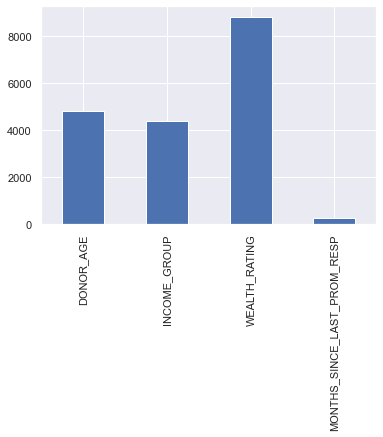

In [11]:
missing_data = is_missing(training_data)
print(missing_data)
missing_data.plot(kind = 'bar')

 * **Lets checks if there are missing values in Test_set**

DONOR_AGE                       529
INCOME_GROUP                    481
WEALTH_RATING                  1006
MONTHS_SINCE_LAST_PROM_RESP      26
dtype: int64


<AxesSubplot:>

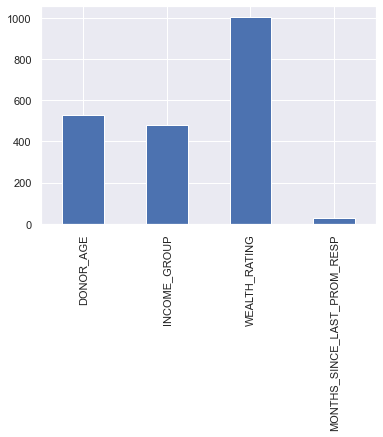

In [12]:
missing_data = is_missing(test_data)
print(missing_data)
missing_data.plot(kind = 'bar')

**There are missing values in our dataset**
* lets investigate the missing values for each of the columns with missing values

**Let a version of the training_data without any missing values for better visualization**

In [13]:
missing_drop = training_data.dropna()

# `missing value :DONOR_AGE. `

In [14]:
# lets count the number of unique ages of the donors

print('The number of unique age is :',training_data.DONOR_AGE.nunique())
print('The minimum age is :',training_data.DONOR_AGE.min())
print('The maximum age is :',training_data.DONOR_AGE.max())

The number of unique age is : 80
The minimum age is : 0.0
The maximum age is : 87.0


<a id=9></a>
**<h1>Countplot</h1>**
* We can visualize the number of donations by age.

<AxesSubplot:xlabel='DONOR_AGE', ylabel='count'>

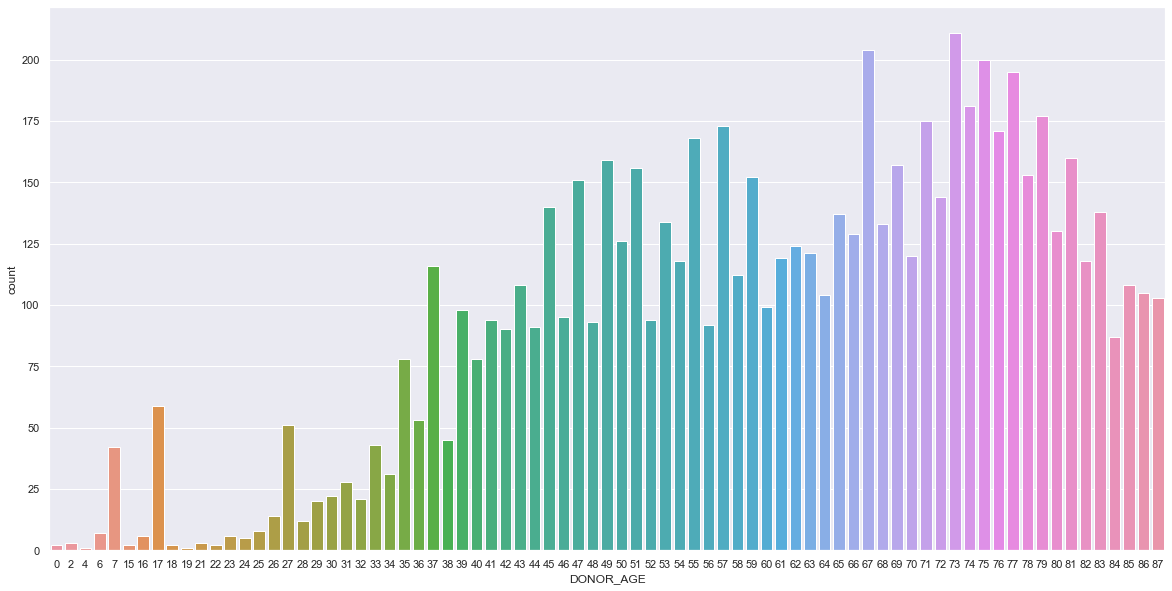

In [15]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x = missing_drop.DONOR_AGE.astype(int))

<a id=9></a>
**<h1>Distribution Plot</h1>**
* We can visualize the distribution of age.
      its left skewed showing that the missing values can be filled with the median due to its robustness .

<AxesSubplot:xlabel='DONOR_AGE', ylabel='Density'>

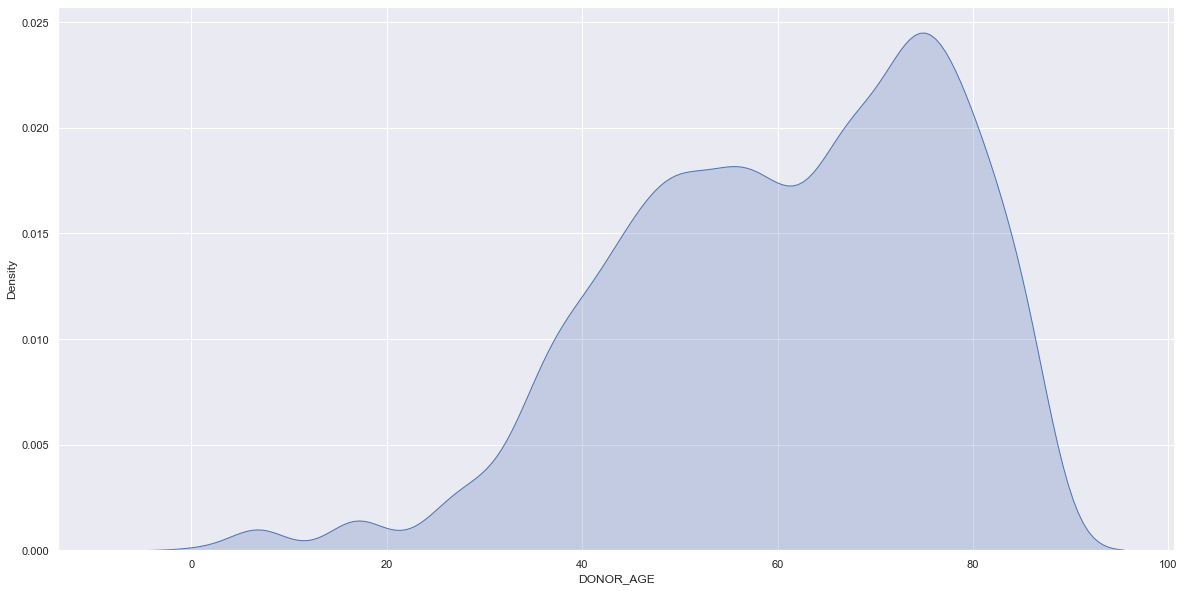

In [16]:
fig = plt.figure(figsize=(20,10))
sns.kdeplot(x = missing_drop.DONOR_AGE.astype(int),shade = True)

* **filling the age missing values with the median**

In [17]:
median_age = training_data.DONOR_AGE.median()
print('The median age is : ',median_age)
training_data.DONOR_AGE = training_data.DONOR_AGE.fillna(value = median_age)

# filling the missing values in test set with that of the training data
test_data.DONOR_AGE = test_data.DONOR_AGE.fillna(value = median_age)

The median age is :  60.0


# `missing value :INCOME_GROUP. `

<a id=9></a>
**<h1>Countplot</h1>**
* We can visualize the number of observations in each INCOME_GROUP.

<AxesSubplot:xlabel='INCOME_GROUP', ylabel='count'>

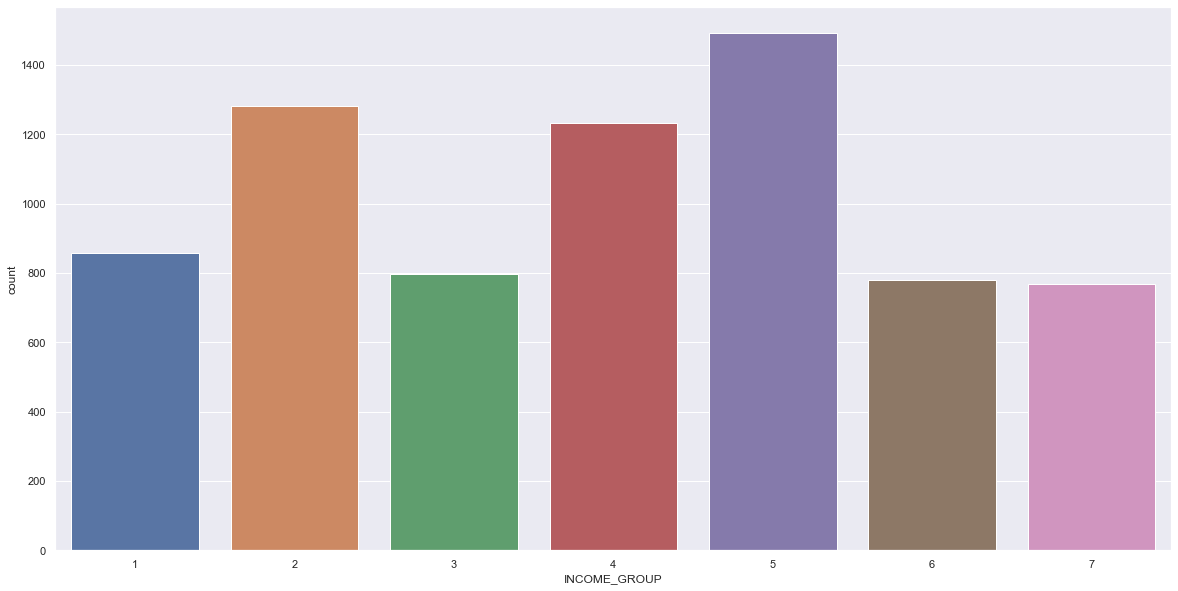

In [18]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x = missing_drop.INCOME_GROUP.astype(int))

In [19]:
missing_drop.INCOME_GROUP.value_counts().keys()

Float64Index([5.0, 2.0, 4.0, 1.0, 3.0, 6.0, 7.0], dtype='float64')

<AxesSubplot:ylabel='INCOME_GROUP'>

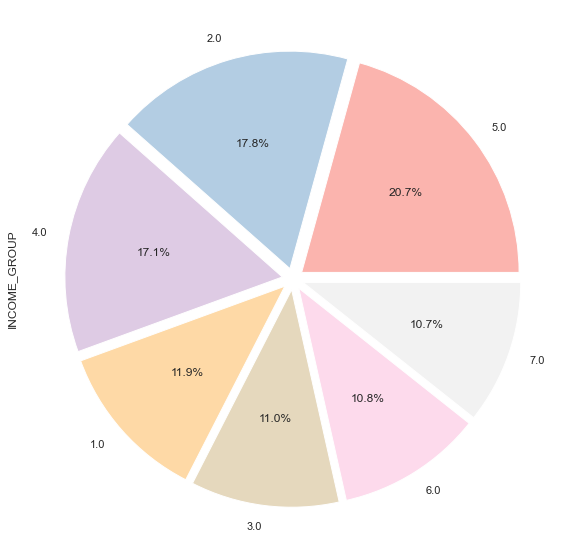

In [20]:
fig = plt.figure(figsize=(20,10))
missing_drop.INCOME_GROUP.value_counts().plot(kind = 'pie',explode = [0.05]*7,cmap = 'Pastel1',autopct =  '%0.1f%%')

<a id=9></a>
**<h1>Distribution Plot</h1>**
* We can visualize the distribution INCOME_GROUP.
      its multi modal. The missing values can be filled with the mode due to its categorical nature

<AxesSubplot:xlabel='INCOME_GROUP', ylabel='Density'>

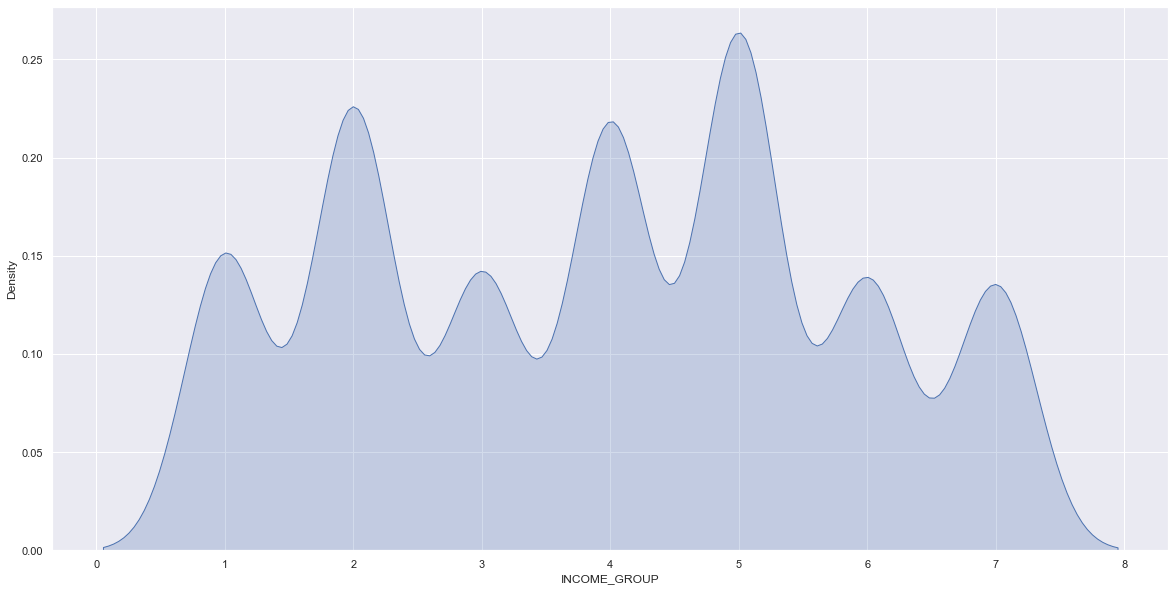

In [21]:
fig = plt.figure(figsize=(20,10))
sns.kdeplot(x = missing_drop.INCOME_GROUP.astype(int),shade = True)

* **filling the INCOME_GROUP values with the mode**

In [22]:
modal_INCOME_GROUP = training_data.INCOME_GROUP.mode()[0]
print('The modal INCOME_GROUP  is : ',modal_INCOME_GROUP)
training_data.INCOME_GROUP = training_data.INCOME_GROUP.fillna(value = modal_INCOME_GROUP)

# filling the missing values in test set with that of the training data
test_data.INCOME_GROUP = test_data.INCOME_GROUP.fillna(value = modal_INCOME_GROUP)

The modal INCOME_GROUP  is :  5.0


# `missing value :WEALTH_RATING. `

<a id=9></a>
**<h1>Countplot</h1>**
* We can visualize the number of observations in each WEALTH_RATING.

<AxesSubplot:xlabel='WEALTH_RATING', ylabel='count'>

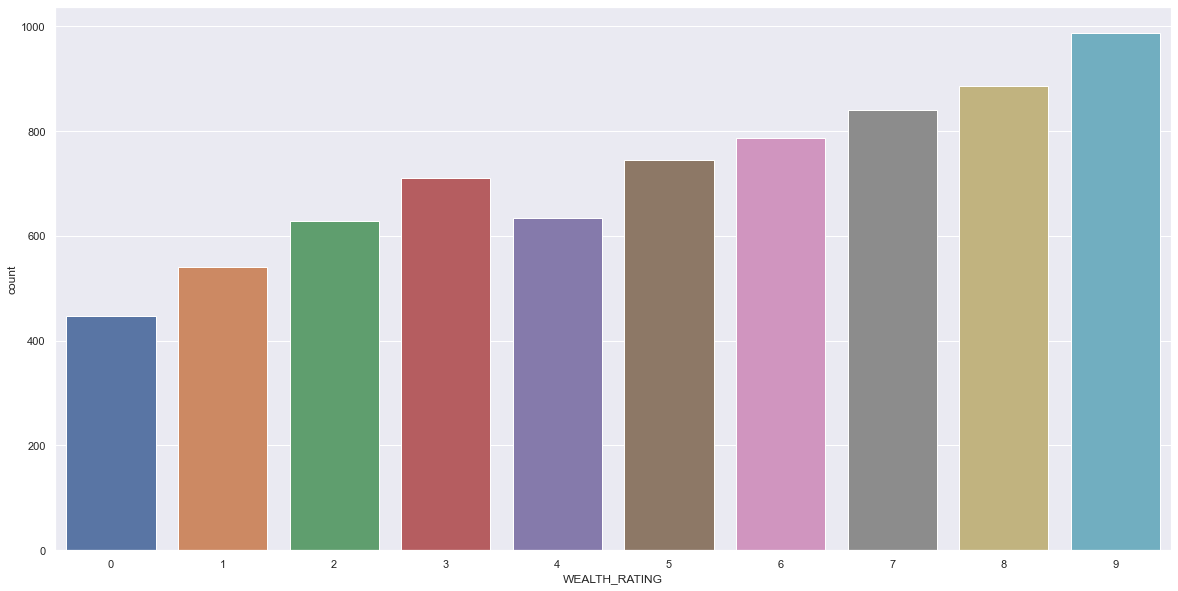

In [23]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x = missing_drop.WEALTH_RATING.astype(int))

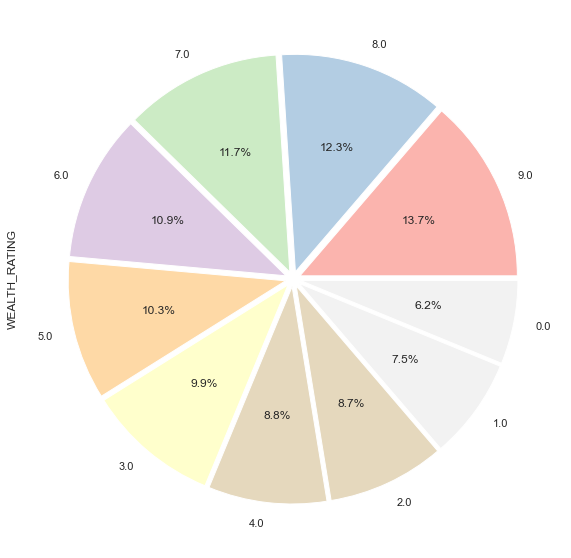

In [24]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = missing_drop.WEALTH_RATING.value_counts().plot(kind = 'pie',explode = [0.035]*10,ax = ax,cmap = 'Pastel1',autopct =  '%0.1f%%')

<a id=9></a>
**<h1>Distribution Plot</h1>**
* We can visualize the distribution WEALTH_RATING.
      its left skewed showing that the missing values can be filled with the median due to its robustness .

<AxesSubplot:xlabel='WEALTH_RATING', ylabel='Density'>

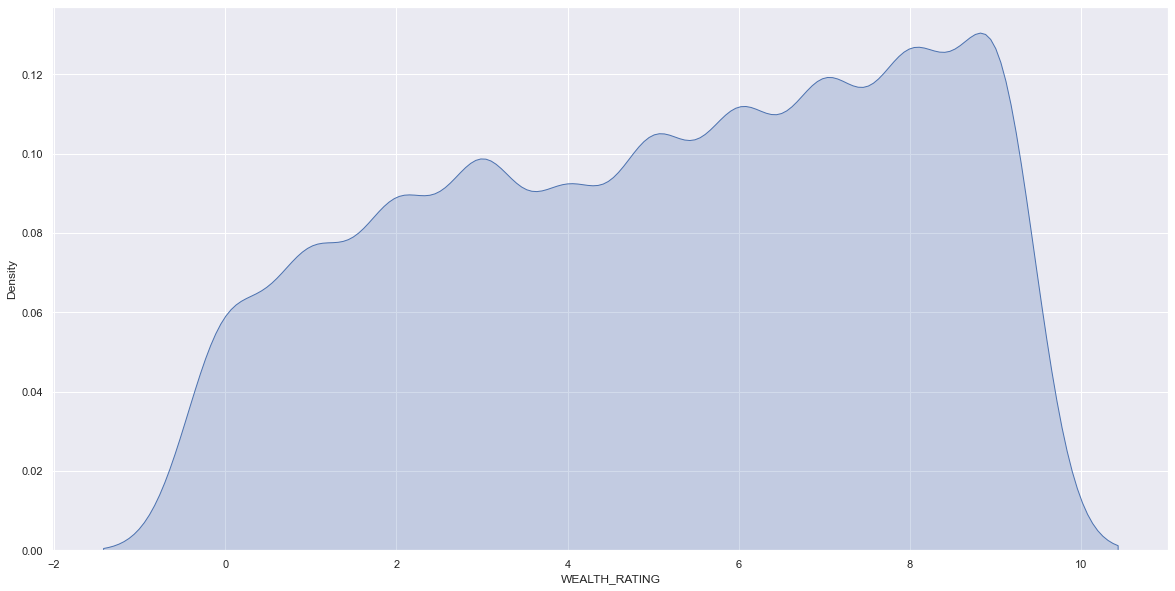

In [25]:
fig = plt.figure(figsize=(20,10))
sns.kdeplot(x = missing_drop.WEALTH_RATING.astype(int),shade = True)

* **filling the WEALTH_RATING values with the median**

In [26]:
median_WEALTH_RATING = training_data.WEALTH_RATING.median()
print('The median WEALTH_RATING  is : ',median_WEALTH_RATING)
training_data.WEALTH_RATING = training_data.WEALTH_RATING.fillna(value = median_WEALTH_RATING)

# filling the missing values in test set with that of the training data
test_data.WEALTH_RATING = test_data.WEALTH_RATING.fillna(value = median_WEALTH_RATING)

The median WEALTH_RATING  is :  5.0


# `missing value :MONTHS_SINCE_LAST_PROM_RESP. `

<a id=9></a>
**<h1>Countplot</h1>**
* We can visualize the number of observations in each MONTHS_SINCE_LAST_PROM_RESP.

<AxesSubplot:xlabel='MONTHS_SINCE_LAST_PROM_RESP', ylabel='count'>

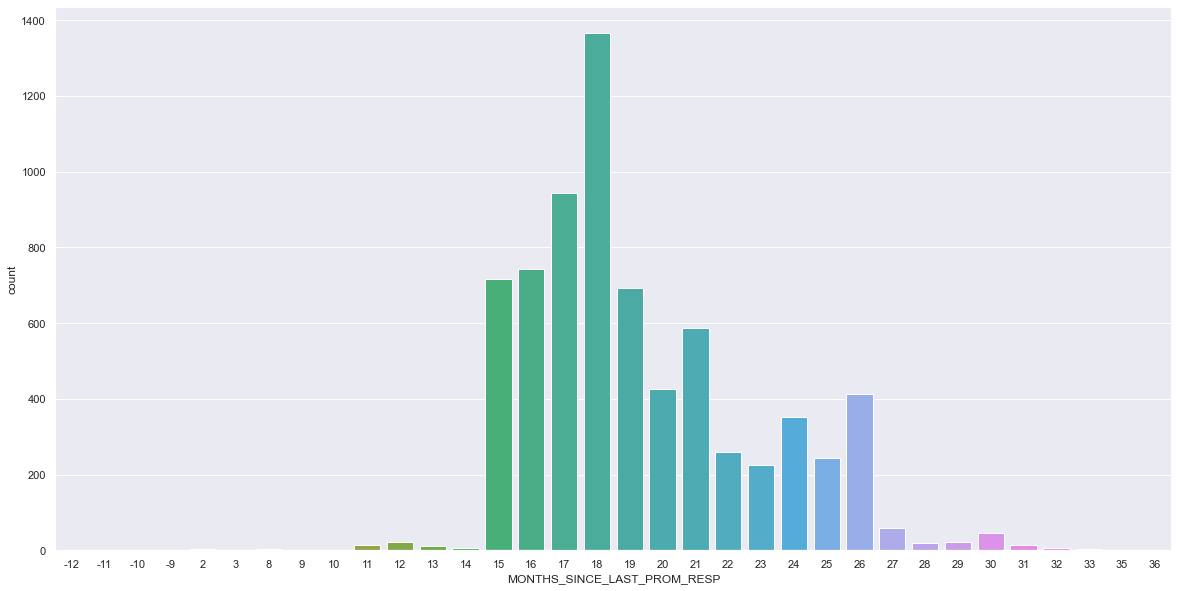

In [27]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x = missing_drop.MONTHS_SINCE_LAST_PROM_RESP.astype(int))

<a id=9></a>
**<h1>Distribution Plot</h1>**
* We can visualize the distribution of MONTHS_SINCE_LAST_PROM_RESP.
      its right skewed showing that the missing values can be filled with the median due to its robustness .

* **We can visualize the distribution of MONTHS_SINCE_LAST_PROM_RESP.**
            its right skewed showing that the missing values can be filled with the median due to its robustness .

<AxesSubplot:xlabel='MONTHS_SINCE_LAST_PROM_RESP', ylabel='Density'>

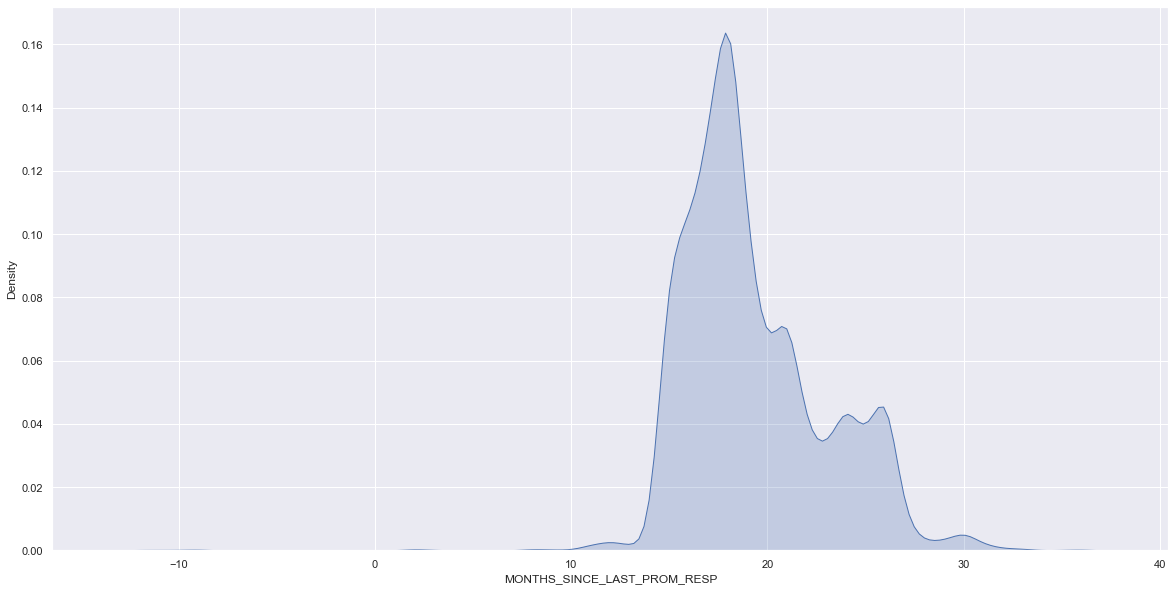

In [28]:
fig = plt.figure(figsize=(20,10))
sns.kdeplot(x = missing_drop.MONTHS_SINCE_LAST_PROM_RESP.astype(int),shade = True)

* **filling the MONTHS_SINCE_LAST_PROM_RESP values with the mode**

In [29]:
median_MONTHS_SINCE_LAST_PROM_RESP = training_data.MONTHS_SINCE_LAST_PROM_RESP.median()
print('The median MONTHS_SINCE_LAST_PROM_RESP  is : ',median_MONTHS_SINCE_LAST_PROM_RESP)
training_data.MONTHS_SINCE_LAST_PROM_RESP = training_data.MONTHS_SINCE_LAST_PROM_RESP.fillna(value = median_MONTHS_SINCE_LAST_PROM_RESP)

# filling the missing values in test set with that of the training data
test_data.MONTHS_SINCE_LAST_PROM_RESP = test_data.MONTHS_SINCE_LAST_PROM_RESP.fillna(value = median_MONTHS_SINCE_LAST_PROM_RESP)


The median MONTHS_SINCE_LAST_PROM_RESP  is :  18.0


**Checking if the values for the training and test set have been filled**

In [30]:
training_data.isnull().sum()

TARGET_B                       0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG_CARD_GIFT_AMT       0
RECENT_RES

In [31]:
test_data.isnull().sum()

MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
IN_HOUSE                       0
URBANICITY                     0
SES                            0
CLUSTER_CODE                   0
HOME_OWNER                     0
DONOR_GENDER                   0
INCOME_GROUP                   0
PUBLISHED_PHONE                0
OVERLAY_SOURCE                 0
MOR_HIT_RATE                   0
WEALTH_RATING                  0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENCY_STATUS_96NK            0
FREQUENCY_STATUS_97NK          0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG_CARD_GIFT_AMT       0
RECENT_RESPONSE_COUNT          0
RECENT_CAR

# `Categorical and Numeric Columns `

In [32]:
# Identifying Categorical and Numeric Data while Excluding the target :  TARGET_B

Categorical_columns = []
for col in training_data.columns:
    unique =training_data[col].nunique()
    if unique <=60 and col != 'TARGET_B':
        #print(col,unique)
        Categorical_columns.append(col)
Numeric_columns = [x for x in training_data.columns if x not in Categorical_columns ][1:]
print('There are %d categorical Columns' %(len(Categorical_columns)))
print('There are %d Numerical Columns' %(len(Numeric_columns)))

There are 24 categorical Columns
There are 23 Numerical Columns


In [33]:
aa = []
for col in training_data.columns:
    unique =training_data[col].nunique()
    if unique <=15 and col != 'TARGET_B':
        print(col,unique)
        aa.append(col)
        
        

IN_HOUSE 2
URBANICITY 6
SES 5
HOME_OWNER 2
DONOR_GENDER 4
INCOME_GROUP 7
PUBLISHED_PHONE 2
OVERLAY_SOURCE 4
WEALTH_RATING 10
PEP_STAR 2
RECENCY_STATUS_96NK 6
FREQUENCY_STATUS_97NK 4
RECENT_CARD_RESPONSE_COUNT 10


*  **lets take a look at the categorical data**
          There are some special characters embedded with other labels

In [34]:
cat_data = training_data[Categorical_columns]
cat_data.head()

MONTHS_SINCE_ORIGIN  IN_HOUSE URBANICITY SES CLUSTER_CODE HOME_OWNER  \
0                  101         0          ?   ?            .          H   
1                  137         0          R   2           45          H   
2                  113         0          S   1           11          H   
3                   92         0          U   2            4          H   
4                  101         0          R   2           49          U   

  DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE OVERLAY_SOURCE  ...  \
0            M           2.0                0              P  ...   
1            M           7.0                0              P  ...   
2            F           5.0                0              P  ...   
3            F           6.0                1              B  ...   
4            F           2.0                1              B  ...   

   FREQUENCY_STATUS_97NK  RECENT_CARD_RESPONSE_PROP  RECENT_RESPONSE_COUNT  \
0                      1                      0.000                      1   
1                      2                      0.250                      4   
2                      3                      0.545                      9   
3                      3                      0.400                      9   
4                      1                      0.111                      2   

  RECENT_CARD_RESPONSE_COUNT  MONTHS_SINCE_LAST_PROM_RESP  LIFETIME_CARD_PROM  \
0                          0                         26.0                  19   
1                          2                         11.0                  32   
2                          6                         14.0                  44   
3                          4                         11.0                  31   
4                          1                         18.0                  30   

   CARD_PROM_12  NUMBER_PROM_12  MONTHS_SINCE_LAST_GIFT  FILE_CARD_GIFT  
0             5              12                      26               7  
1             7              21                       7              12  
2            11              32                       6              16  
3            11              33                       6              12  
4             6              19                      18               3  

[5 rows x 24 columns]

*  **Checking the unique values of URBANICITY.**


In [35]:
training_data.URBANICITY.unique()

array(['?', 'R', 'S', 'U', 'C', 'T'], dtype=object)

In [36]:
# replacing ? for 'Unknown'

training_data.URBANICITY = training_data.URBANICITY.str.replace('?','Unknown')
test_data.URBANICITY = test_data.URBANICITY.str.replace('?','Unknown')

*  **Checking the unique values of SES.**


In [37]:
training_data.SES.unique()

array(['?', '2', '1', '3', '4'], dtype=object)

In [38]:
# replacing ? for '5', a new socio-economic cluster code

training_data.SES = training_data.SES.str.replace('?','5')
test_data.SES = test_data.SES.str.replace('?','5')

*  **Checking the unique values of SES.**


In [39]:
print(sorted(training_data.CLUSTER_CODE.unique()))

[' .', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '6', '7', '8', '9']


In [40]:
# replacing . for '54', as a new cluster code

training_data.CLUSTER_CODE = training_data.CLUSTER_CODE.str.replace('.','54')
test_data.CLUSTER_CODE = test_data.CLUSTER_CODE.str.replace('.','54')

In [41]:
# a peek into the transfomed categorical_data 
training_data[Categorical_columns].head()

MONTHS_SINCE_ORIGIN  IN_HOUSE URBANICITY SES CLUSTER_CODE HOME_OWNER  \
0                  101         0    Unknown   5           54          H   
1                  137         0          R   2           45          H   
2                  113         0          S   1           11          H   
3                   92         0          U   2            4          H   
4                  101         0          R   2           49          U   

  DONOR_GENDER  INCOME_GROUP  PUBLISHED_PHONE OVERLAY_SOURCE  ...  \
0            M           2.0                0              P  ...   
1            M           7.0                0              P  ...   
2            F           5.0                0              P  ...   
3            F           6.0                1              B  ...   
4            F           2.0                1              B  ...   

   FREQUENCY_STATUS_97NK  RECENT_CARD_RESPONSE_PROP  RECENT_RESPONSE_COUNT  \
0                      1                      0.000                      1   
1                      2                      0.250                      4   
2                      3                      0.545                      9   
3                      3                      0.400                      9   
4                      1                      0.111                      2   

  RECENT_CARD_RESPONSE_COUNT  MONTHS_SINCE_LAST_PROM_RESP  LIFETIME_CARD_PROM  \
0                          0                         26.0                  19   
1                          2                         11.0                  32   
2                          6                         14.0                  44   
3                          4                         11.0                  31   
4                          1                         18.0                  30   

   CARD_PROM_12  NUMBER_PROM_12  MONTHS_SINCE_LAST_GIFT  FILE_CARD_GIFT  
0             5              12                      26               7  
1             7              21                       7              12  
2            11              32                       6              16  
3            11              33                       6              12  
4             6              19                      18               3  

[5 rows x 24 columns]

# Exploring the relationship between the Categorical and the Target Column

*  **Lets explore the ratio of the Targets**

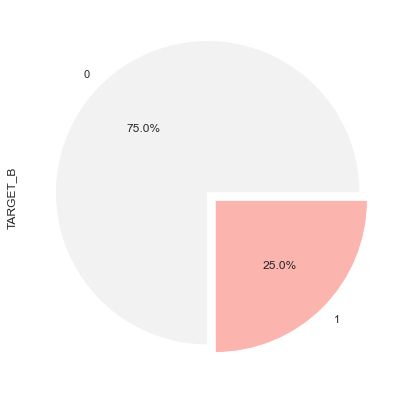

In [42]:
fig = plt.figure(figsize=(7,7))
ax = fig.subplots()
a = training_data.TARGET_B.value_counts().plot(kind = 'pie',explode = [0.035]*2,cmap = 'Pastel1_r',autopct =  '%0.1f%%')

*  **IN_HOUSE**
        Lets explore the relationship of those who are part of the organization's In House program with TARGET_B

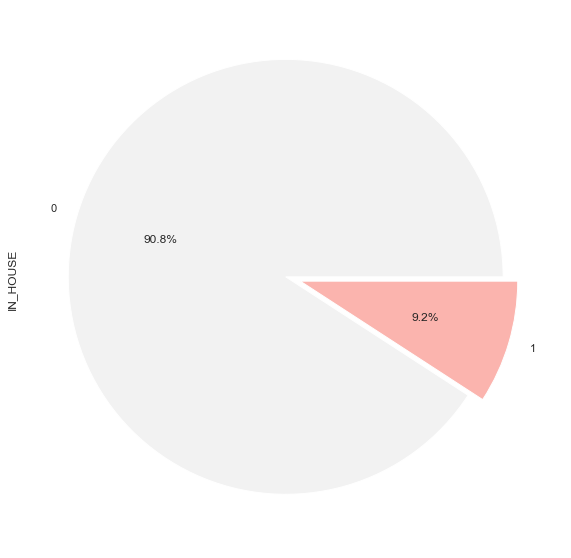

In [43]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].IN_HOUSE.value_counts().plot(kind = 'pie',explode = [0.035]*2,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


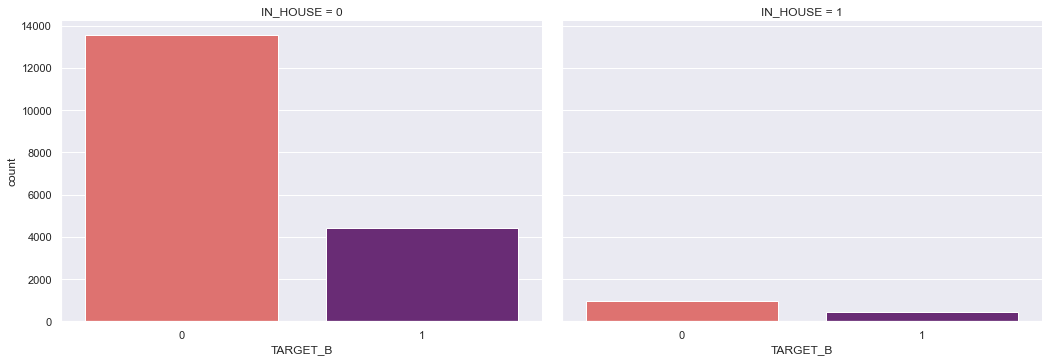

In [44]:
g = sns.catplot(x = 'TARGET_B',  col='IN_HOUSE',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


        This shows that those that participated in the IN_HOUSE program tend to donate more

*  **URBANICITY**
        Lets explore the effect of URBANICITY on donation

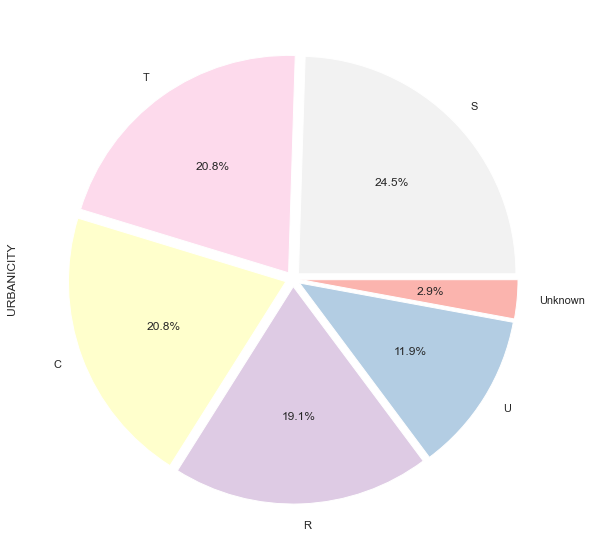

In [45]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].URBANICITY.value_counts().plot(kind = 'pie',explode = [0.035]*6,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


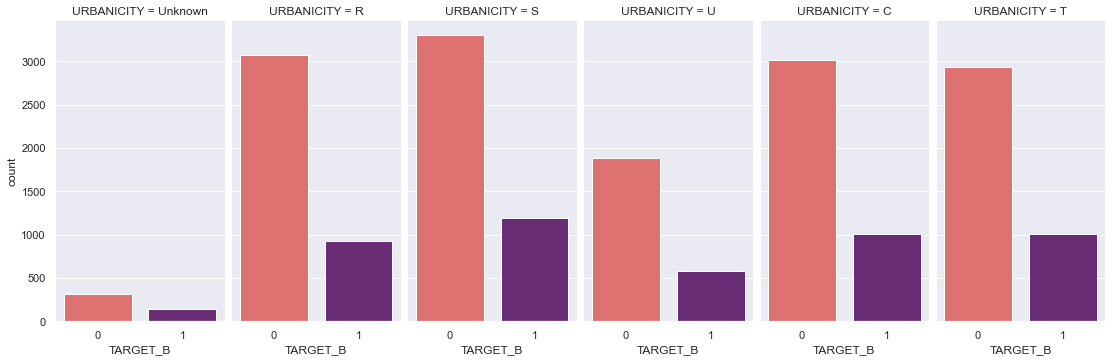

In [46]:
g = sns.catplot(x = 'TARGET_B',  col='URBANICITY',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


        This shows that those in the suburban area tend to donate more than other settlement areas

*  **socio-economic cluster (SES)**
        What impact does socio-economic-status the have on donation ?

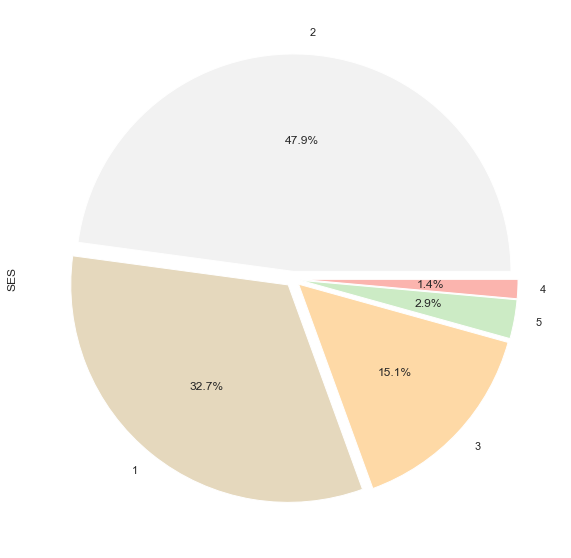

In [47]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].SES.value_counts().plot(kind = 'pie',explode = [0.035]*5,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


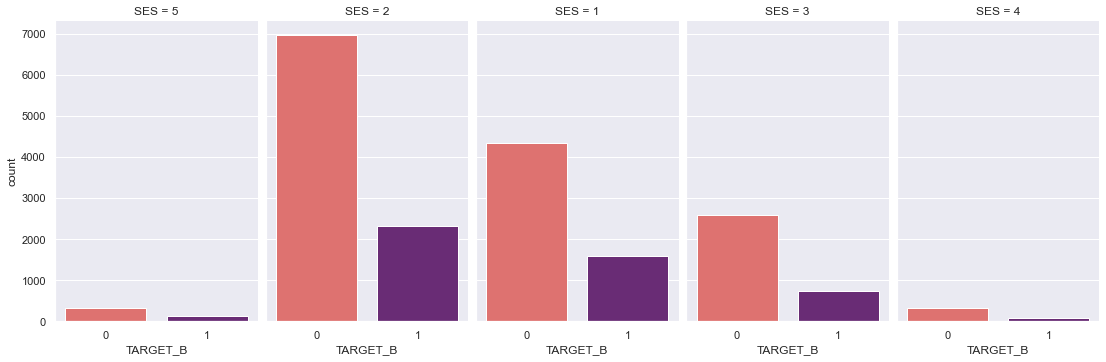

In [48]:
g = sns.catplot(x = 'TARGET_B',  col='SES',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)

        This shows that those with SES of 2 tend to donate more than clusters

*  **HOME_OWNER**
        Do home owners donate more ?

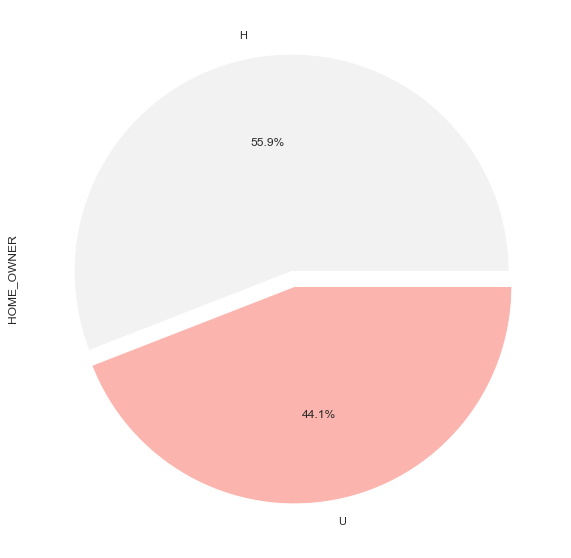

In [49]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].HOME_OWNER.value_counts().plot(kind = 'pie',explode = [0.035]*2,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


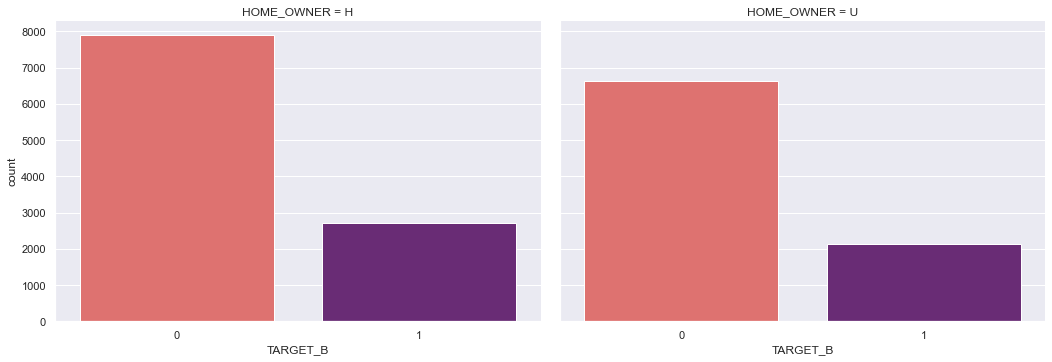

In [50]:
g = sns.catplot(x = 'TARGET_B',  col='HOME_OWNER',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


        This shows that those HOME OWNERS tend to donate more 

*  **DONOR_GENDER**
        What effect does Gender have on donation

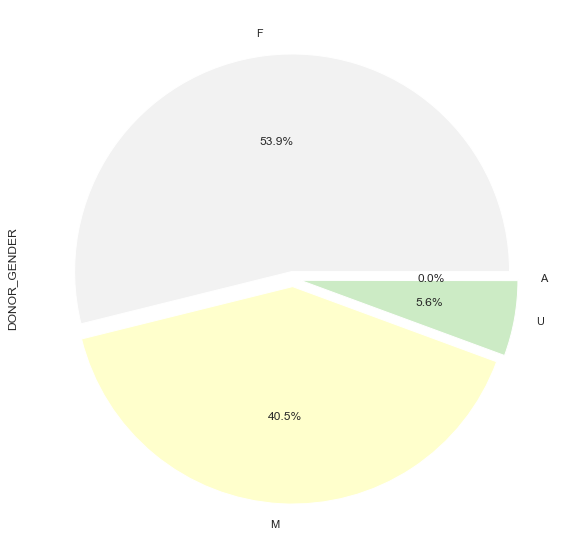

In [51]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].DONOR_GENDER.value_counts().plot(kind = 'pie',explode = [0.035]*4,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


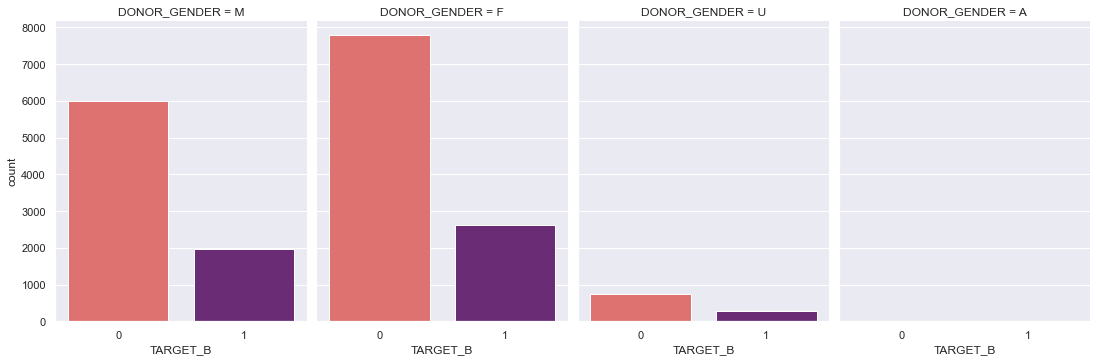

In [52]:
g = sns.catplot(x = 'TARGET_B',  col='DONOR_GENDER',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


        This shows that Females tend to donate more than other Gender types

*  **INCOME_GROUP**
        Does Income affect donation ?

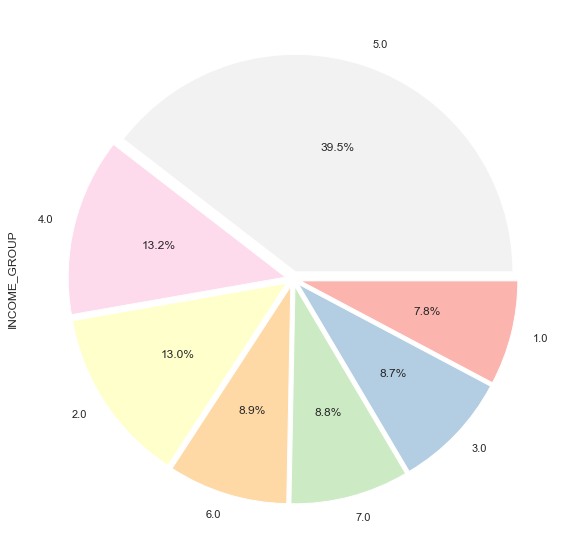

In [53]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].INCOME_GROUP.value_counts().plot(kind = 'pie',explode = [0.035]*7,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


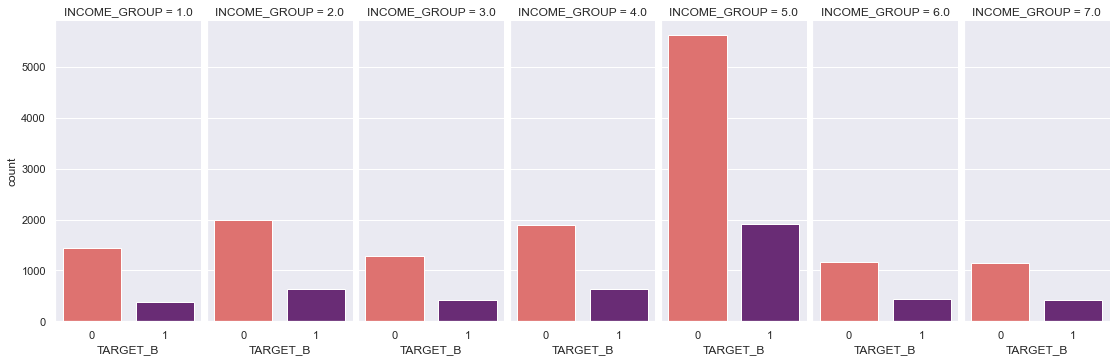

In [54]:
g = sns.catplot(x = 'TARGET_B',  col='INCOME_GROUP',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


*  **PUBLISHED_PHONE**
        is there an effect to the presence of published telephone listing ?

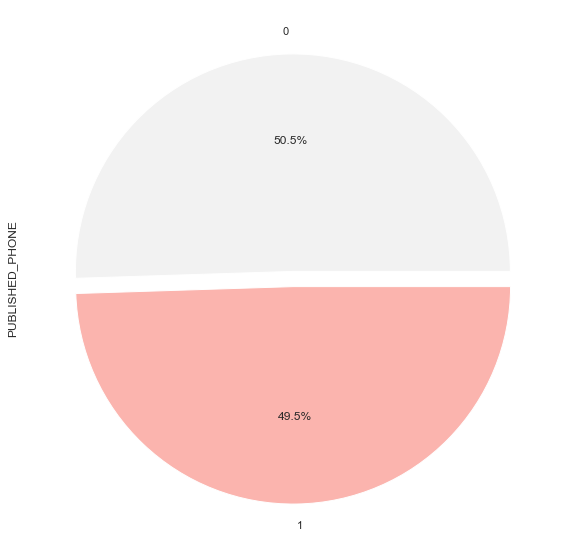

In [55]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].PUBLISHED_PHONE.value_counts().plot(kind = 'pie',explode = [0.035]*2,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


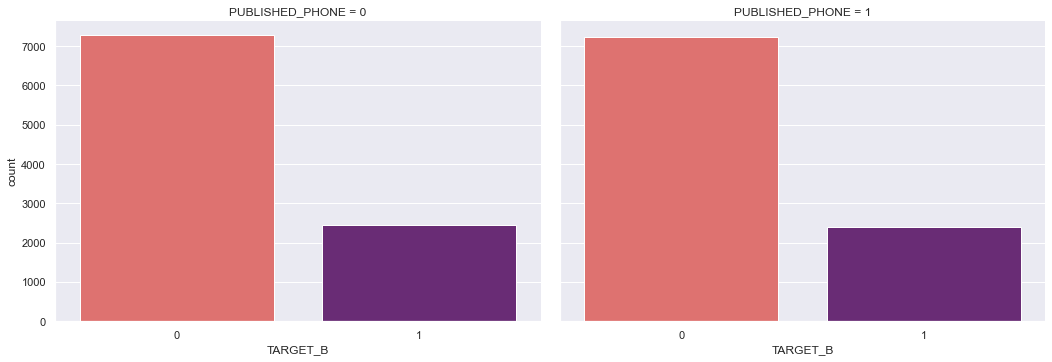

In [56]:
g = sns.catplot(x = 'TARGET_B',  col='PUBLISHED_PHONE',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


*  **OVERLAY_SOURCE**
        lets explore the effect of OVERLAY_SOURCE on donation

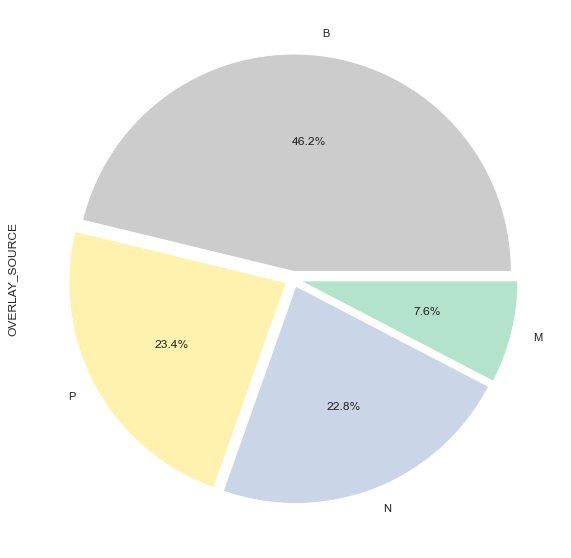

In [57]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].OVERLAY_SOURCE.value_counts().plot(kind = 'pie',explode = [0.035]*4,ax = ax,cmap = 'Pastel2_r',autopct =  '%0.1f%%')


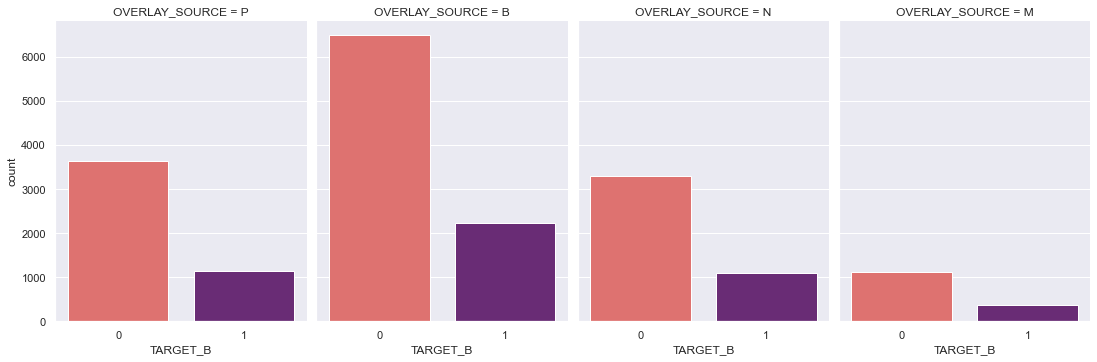

In [58]:
g = sns.catplot(x = 'TARGET_B',  col='OVERLAY_SOURCE',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


        This shows that those with OVERLAY_SOURCE Metromail and Polk tend to donate more individual OVERLAY_SOURCE

*  **WEALTH_RATING**
        is wealth rating significant to donation ?

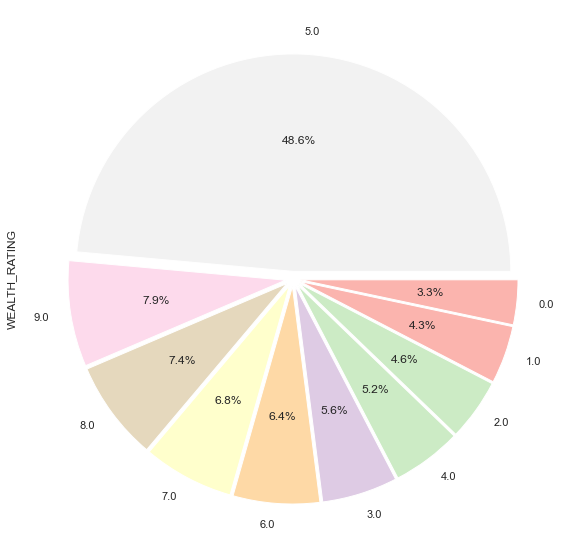

In [59]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].WEALTH_RATING.value_counts().plot(kind = 'pie',explode = [0.035]*10,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


*  **PEP_STAR**
        what's the significance of PEP_STAR on donation ?

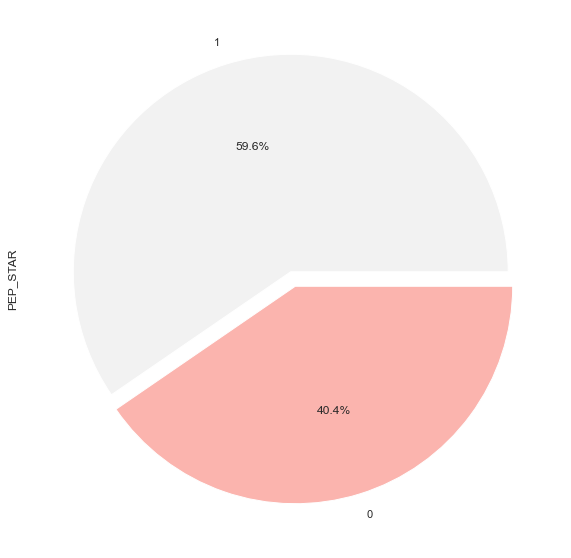

In [60]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].PEP_STAR.value_counts().plot(kind = 'pie',explode = [0.035]*2,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


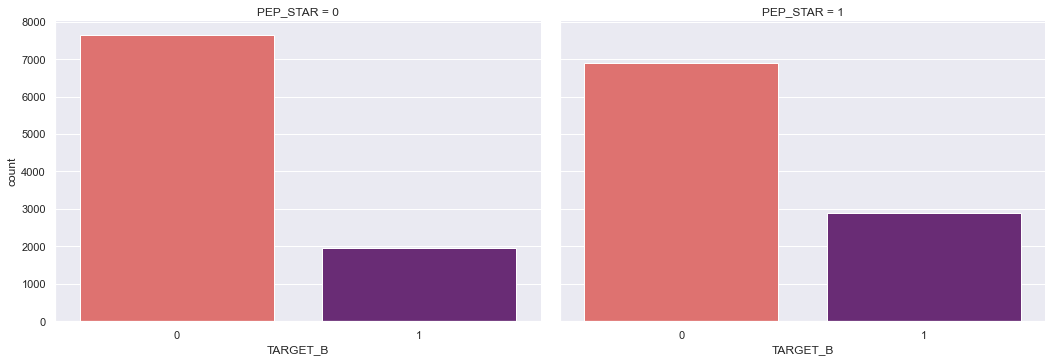

In [61]:
g = sns.catplot(x = 'TARGET_B',  col='PEP_STAR',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


*  **RECENCY_STATUS_96NK**
        does Recency status as of June 1996 impact on donation

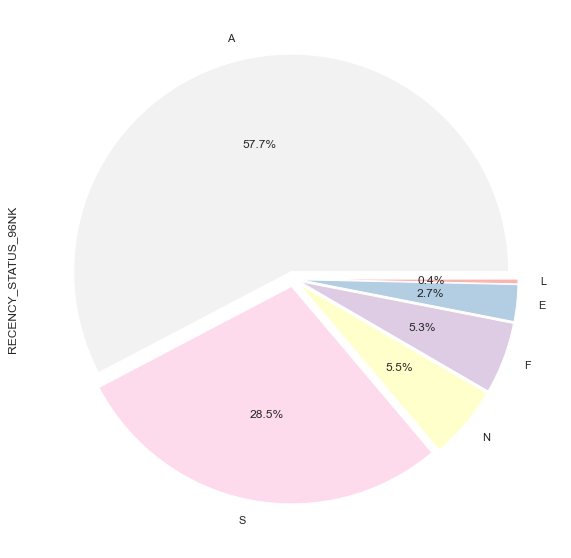

In [62]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].RECENCY_STATUS_96NK.value_counts().plot(kind = 'pie',explode = [0.035]*6,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


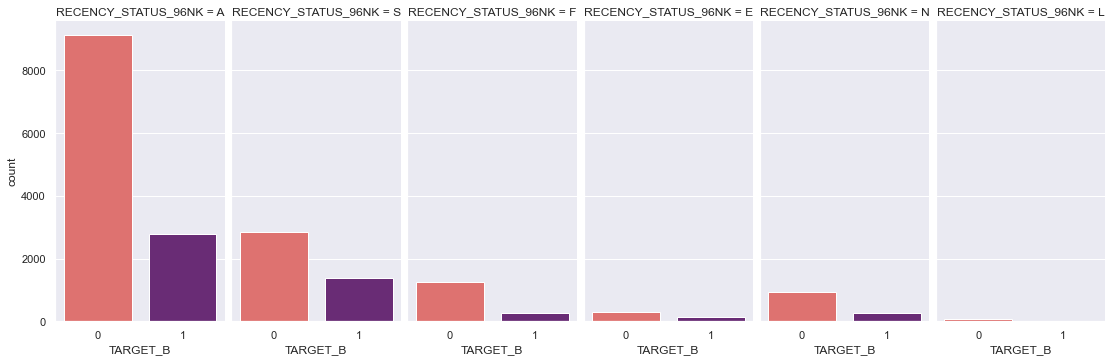

In [63]:
g = sns.catplot(x = 'TARGET_B',  col='RECENCY_STATUS_96NK',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


        This shows that those with RECENCY_STATUS_96NK A tend to donate more than other sRECENCY_STATUS_96NK groups

*  **FREQUENCY_STATUS_97NK**
        does Frequency status as of June 1997 impact on donation

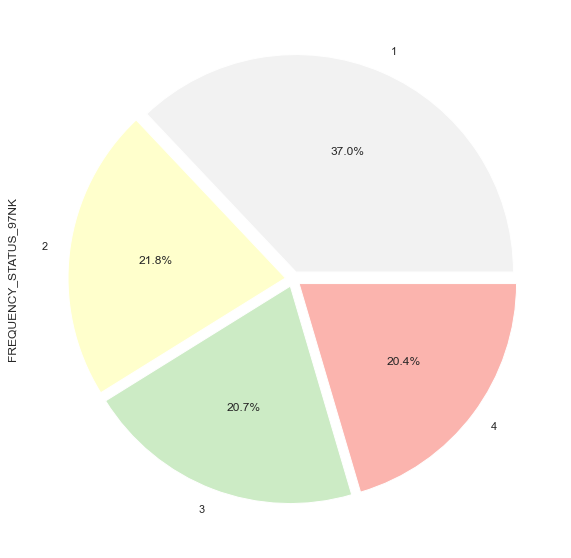

In [64]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].FREQUENCY_STATUS_97NK.value_counts().plot(kind = 'pie',explode = [0.035]*4,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


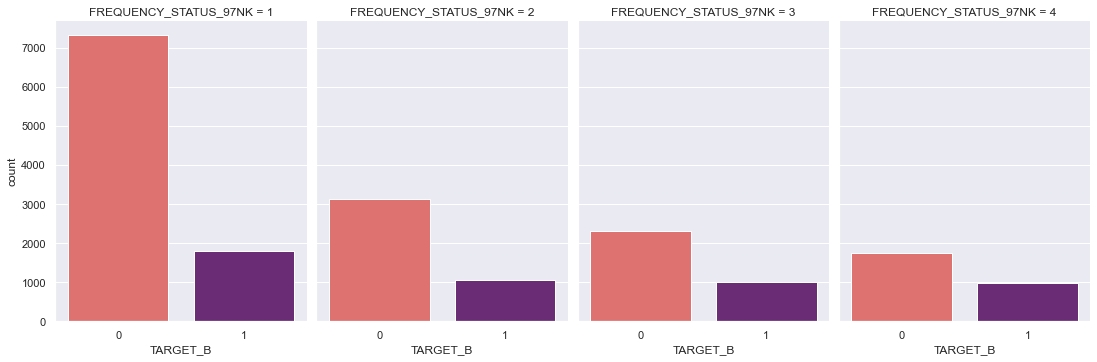

In [65]:
g = sns.catplot(x = 'TARGET_B',  col='FREQUENCY_STATUS_97NK',data=training_data, kind="count",palette='magma_r')
g.fig.set_size_inches(15,5)


*  **RECENT_CARD_RESPONSE_COUNT**
        whats the effect of RECENT_CARD_RESPONSE_COUNT on donation ?

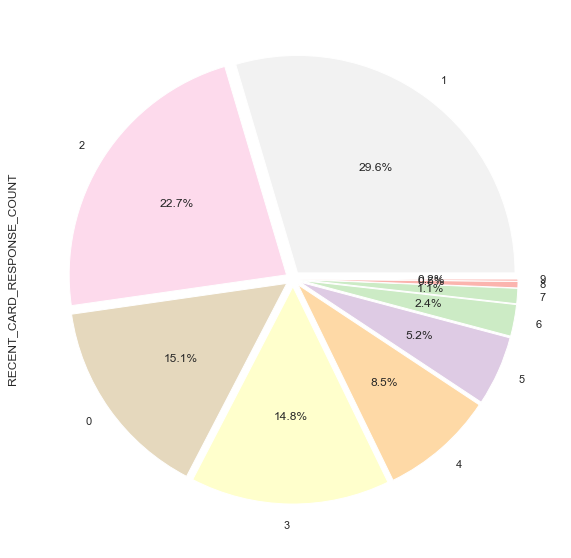

In [66]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
a = training_data[training_data.TARGET_B == 1].RECENT_CARD_RESPONSE_COUNT.value_counts().plot(kind = 'pie',explode = [0.035]*10,ax = ax,cmap = 'Pastel1_r',autopct =  '%0.1f%%')


*  **MONTHS_SINCE_ORIGIN**
        is there a trend in MONTHS_SINCE_ORIGIN with the donation ?

<AxesSubplot:xlabel='MONTHS_SINCE_ORIGIN', ylabel='count'>

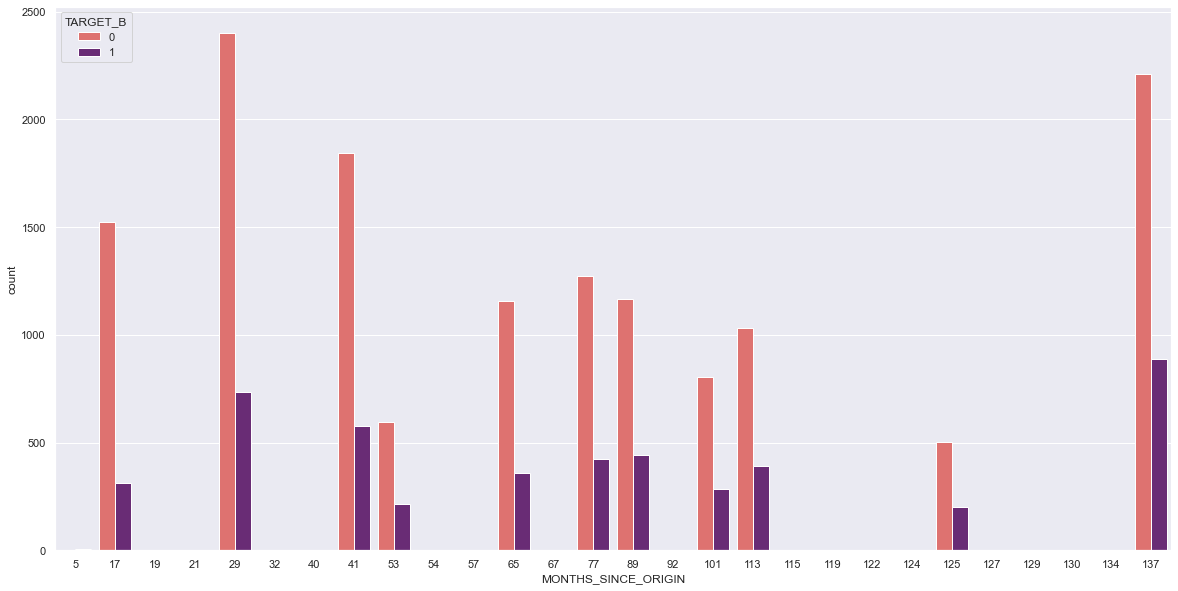

In [67]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x = training_data.MONTHS_SINCE_ORIGIN.astype(int),hue = training_data.TARGET_B,palette='magma_r',)

*  **CLUSTER_CODE**
        is the cluster distribution biased ?

<AxesSubplot:xlabel='CLUSTER_CODE', ylabel='Count'>

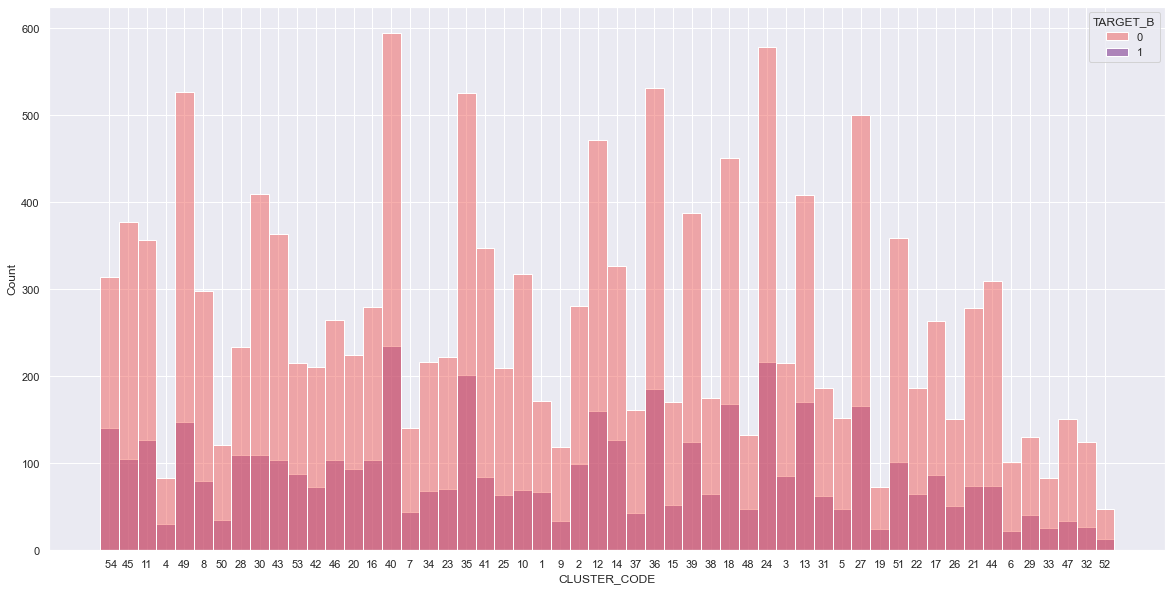

In [68]:
fig = plt.figure(figsize=(20,10))
sns.histplot(x = training_data.CLUSTER_CODE,hue = training_data.TARGET_B,palette='magma_r')

*  **RECENT_STAR_STATUS**
        is there a trend in RECENT_STAR_STATUS with the donation ?

<AxesSubplot:xlabel='RECENT_STAR_STATUS', ylabel='count'>

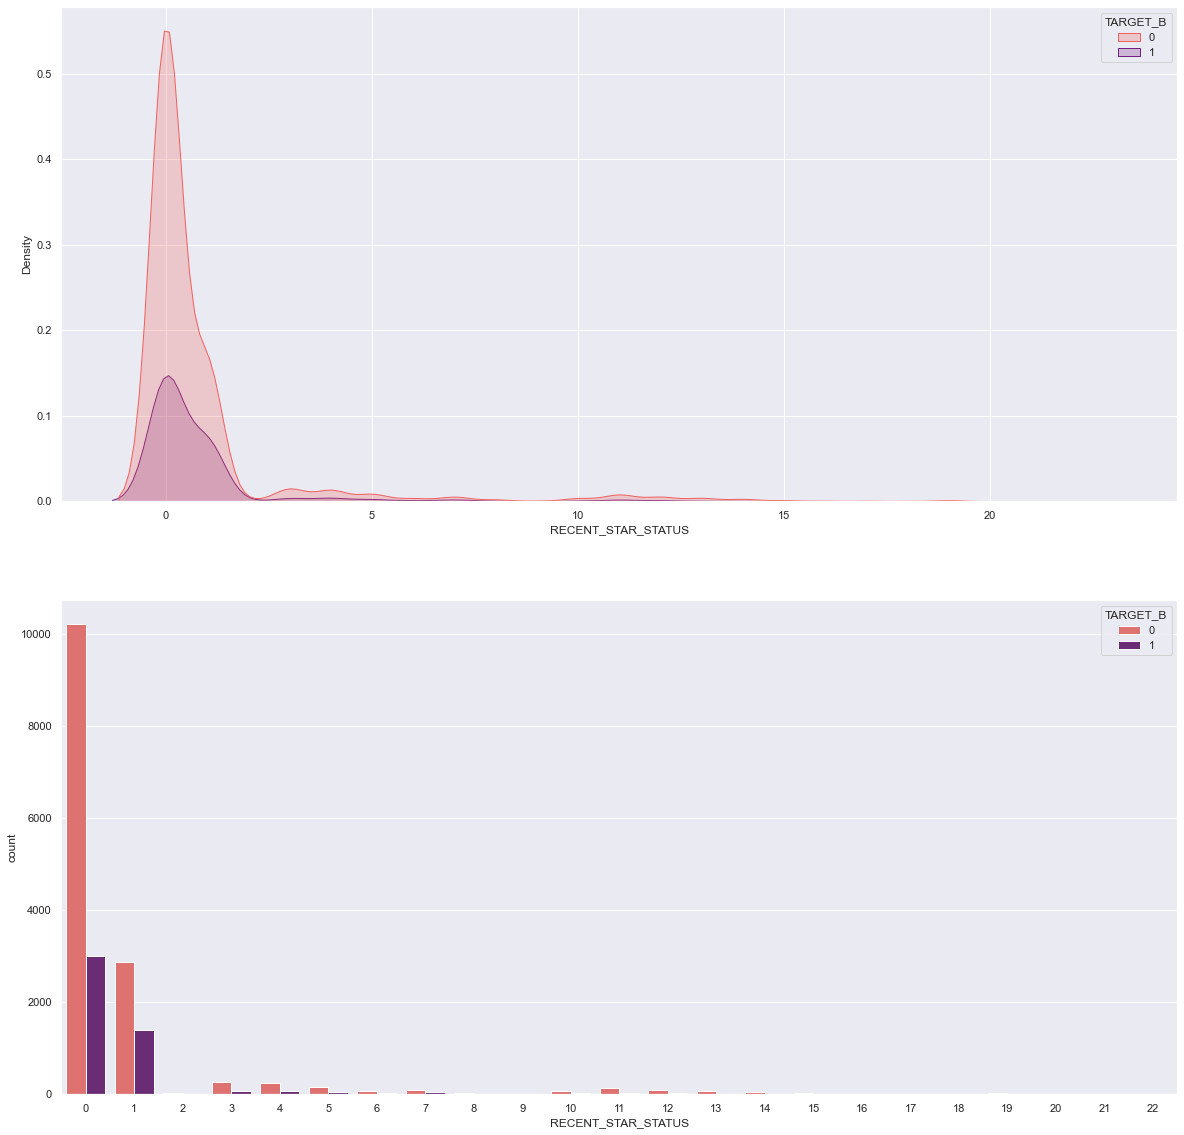

In [69]:
fig,ax = plt.subplots(2,1,figsize=(20, 20))
sns.kdeplot(x = training_data.RECENT_STAR_STATUS,ax = ax[0],hue = training_data.TARGET_B,shade=True,palette='magma_r')
sns.countplot(x = training_data.RECENT_STAR_STATUS,ax = ax[1],hue = training_data.TARGET_B,palette='magma_r')

*  **RECENT_CARD_RESPONSE_PROP**
        is the RECENT_CARD_RESPONSE_PROP evenly distributed ?

<AxesSubplot:xlabel='RECENT_CARD_RESPONSE_PROP', ylabel='Count'>

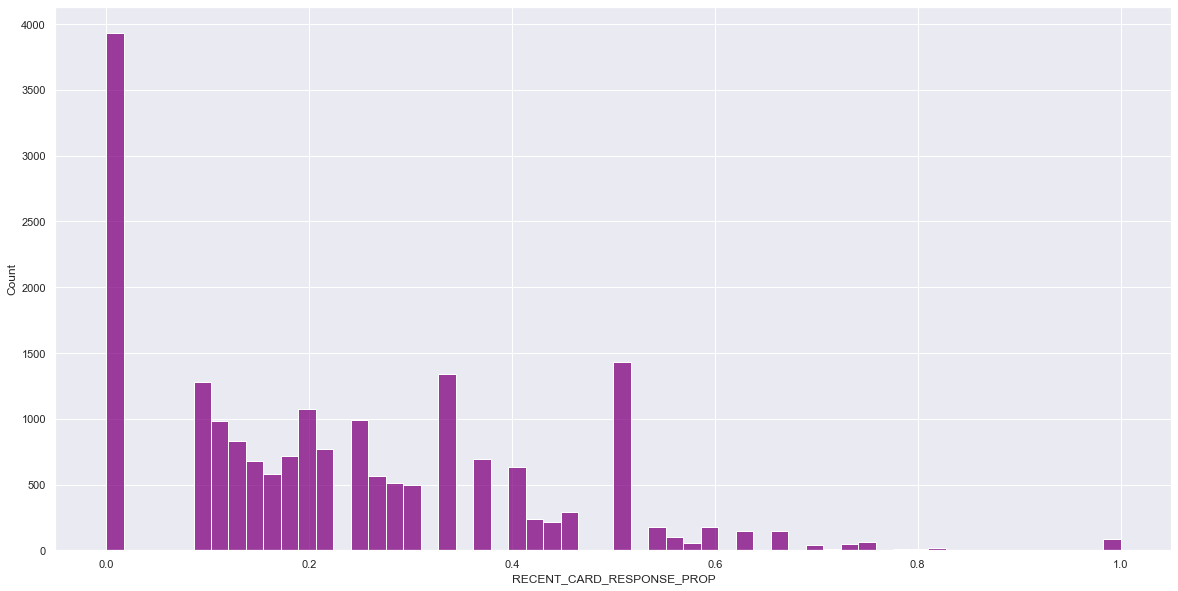

In [70]:
fig = plt.figure(figsize=(20,10))
sns.histplot(x = training_data.RECENT_CARD_RESPONSE_PROP,color='Purple')

<AxesSubplot:xlabel='RECENT_CARD_RESPONSE_PROP', ylabel='Density'>

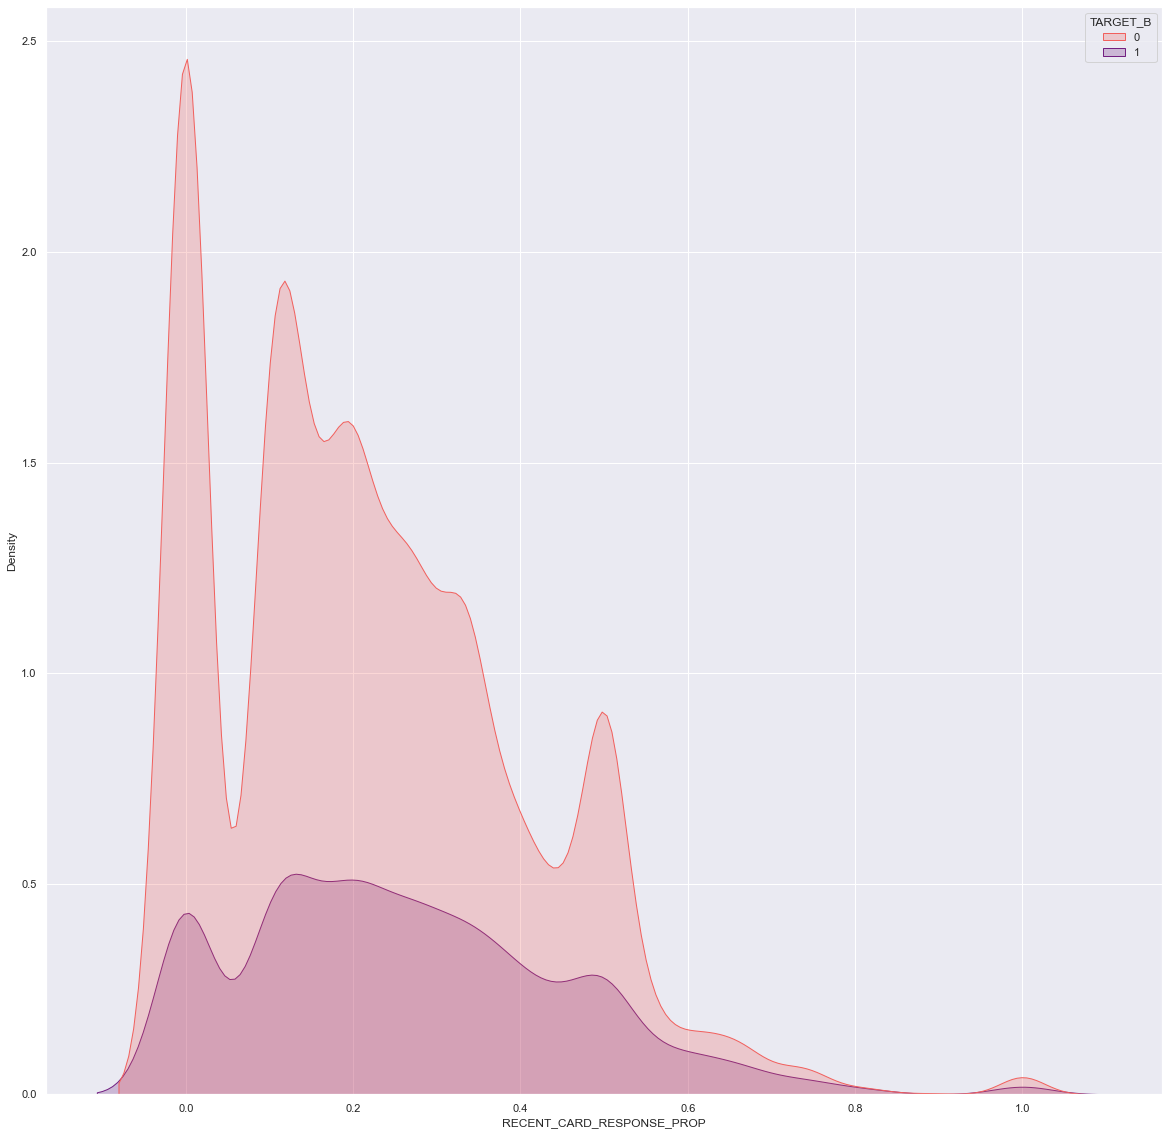

In [71]:
 plt.figure(figsize=(20, 20))
sns.kdeplot(x = training_data.RECENT_CARD_RESPONSE_PROP,hue = training_data.TARGET_B,shade=True,palette='magma_r')


*  **RECENT_RESPONSE_COUNT**
        lets explore the relationship of RECENT_RESPONSE_COUNT with the Target

<AxesSubplot:xlabel='RECENT_RESPONSE_COUNT', ylabel='count'>

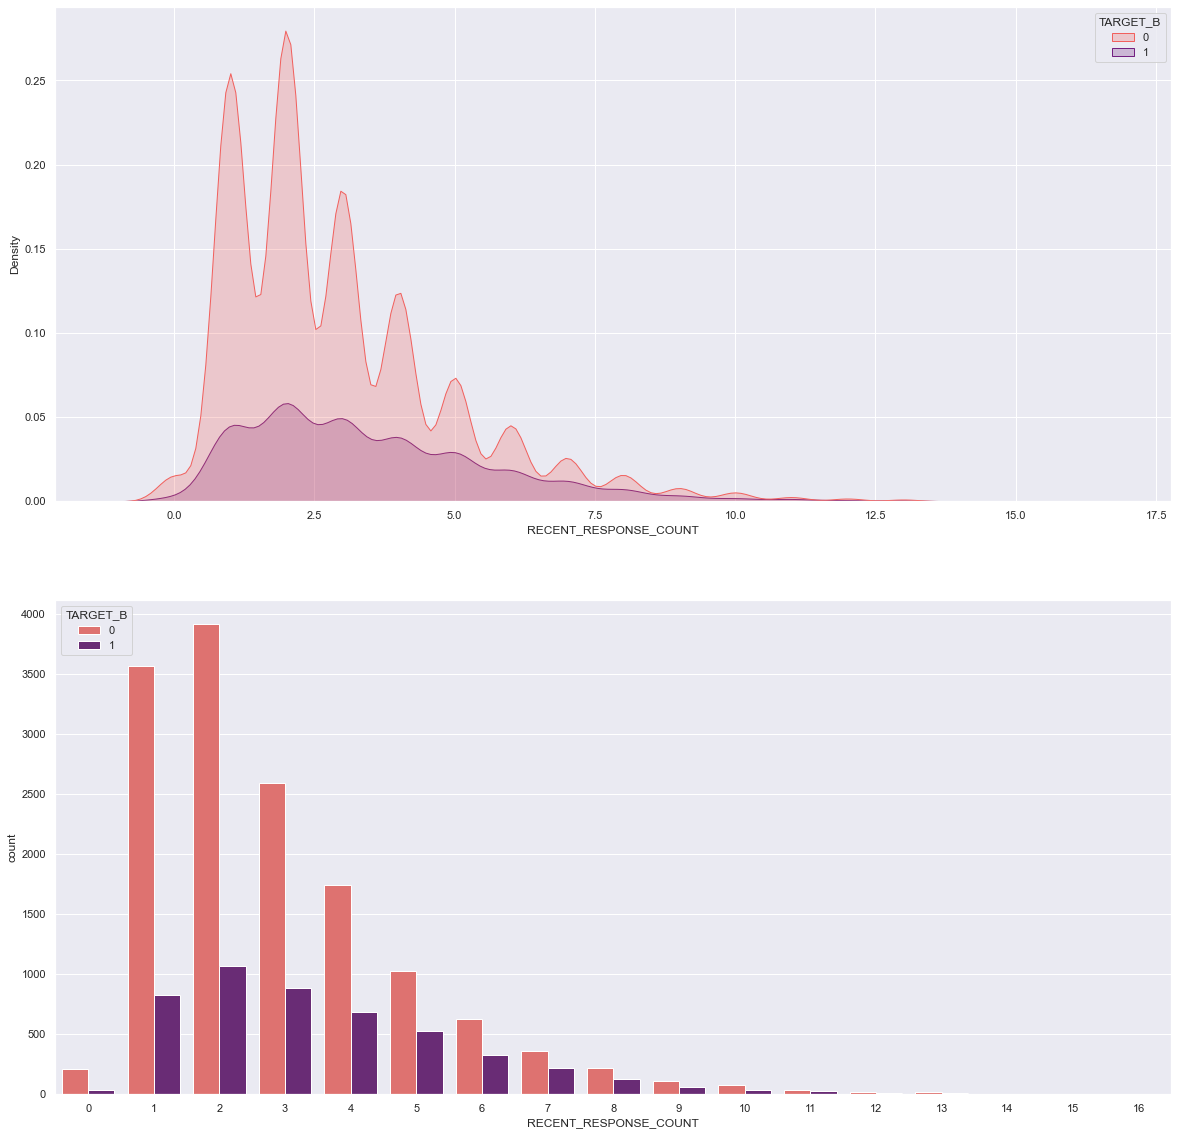

In [72]:
fig,ax = plt.subplots(2,1,figsize=(20, 20))
sns.kdeplot(x = training_data.RECENT_RESPONSE_COUNT,ax = ax[0],hue = training_data.TARGET_B,shade=True,palette='magma_r')
sns.countplot(x = training_data.RECENT_RESPONSE_COUNT,ax = ax[1],hue = training_data.TARGET_B,palette='magma_r')

*  **MONTHS_SINCE_LAST_PROM_RESP**
        Lets explore the impact of MONTHS_SINCE_LAST_PROM_RESP on the target

<AxesSubplot:xlabel='MONTHS_SINCE_LAST_PROM_RESP', ylabel='count'>

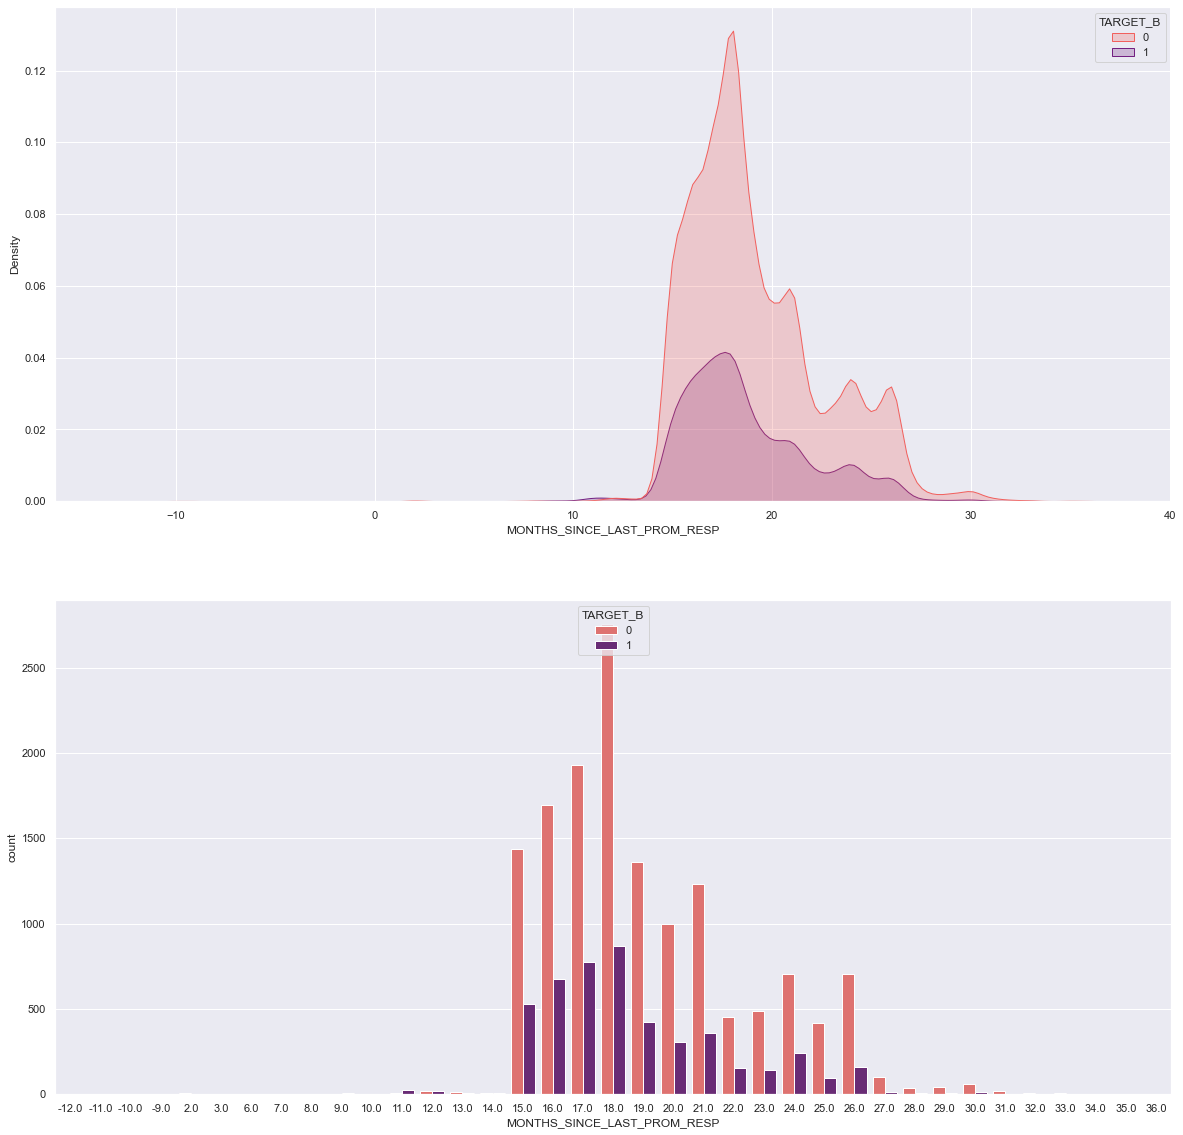

In [73]:
fig,ax = plt.subplots(2,1,figsize=(20, 20))
sns.kdeplot(x = training_data.MONTHS_SINCE_LAST_PROM_RESP,ax = ax[0],hue = training_data.TARGET_B,shade=True,palette='magma_r')
sns.countplot(x = training_data.MONTHS_SINCE_LAST_PROM_RESP,ax = ax[1],hue = training_data.TARGET_B,palette='magma_r')

*  **LIFETIME_CARD_PROM**
        Lets explore the relationship between LIFETIME_CARD_PROM and the target

<AxesSubplot:xlabel='LIFETIME_CARD_PROM', ylabel='count'>

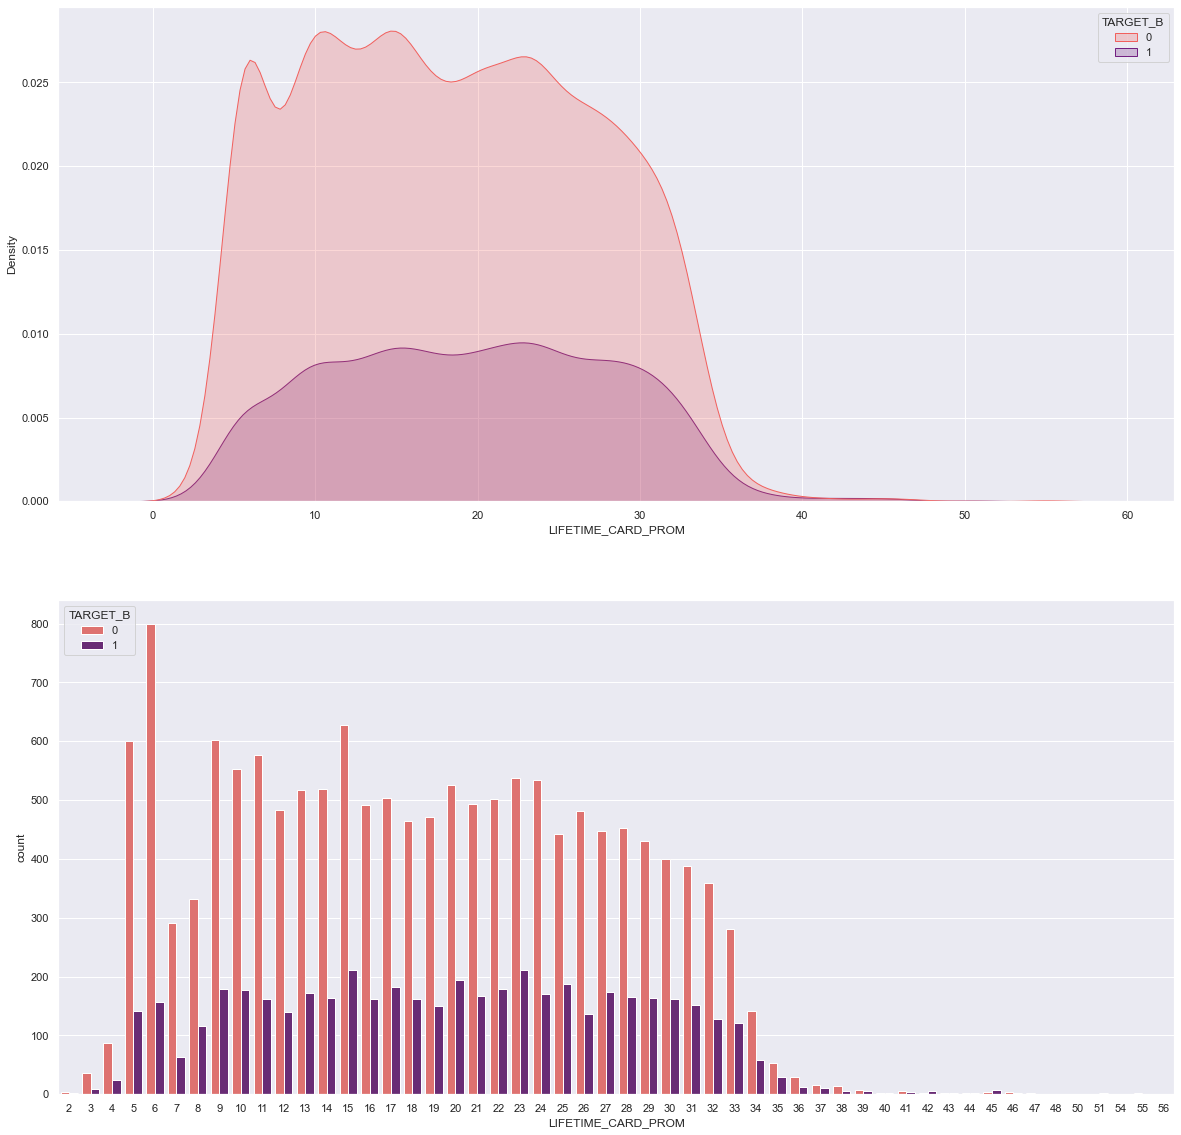

In [74]:
fig,ax = plt.subplots(2,1,figsize=(20, 20))
sns.kdeplot(x = training_data.LIFETIME_CARD_PROM,ax = ax[0],hue = training_data.TARGET_B,shade=True,palette='magma_r')
sns.countplot(x = training_data.LIFETIME_CARD_PROM,ax = ax[1],hue = training_data.TARGET_B,palette='magma_r')

*  **CARD_PROM_12**
        is there a trend between CARD_PROM_12 and the target ?

<AxesSubplot:xlabel='CARD_PROM_12', ylabel='count'>

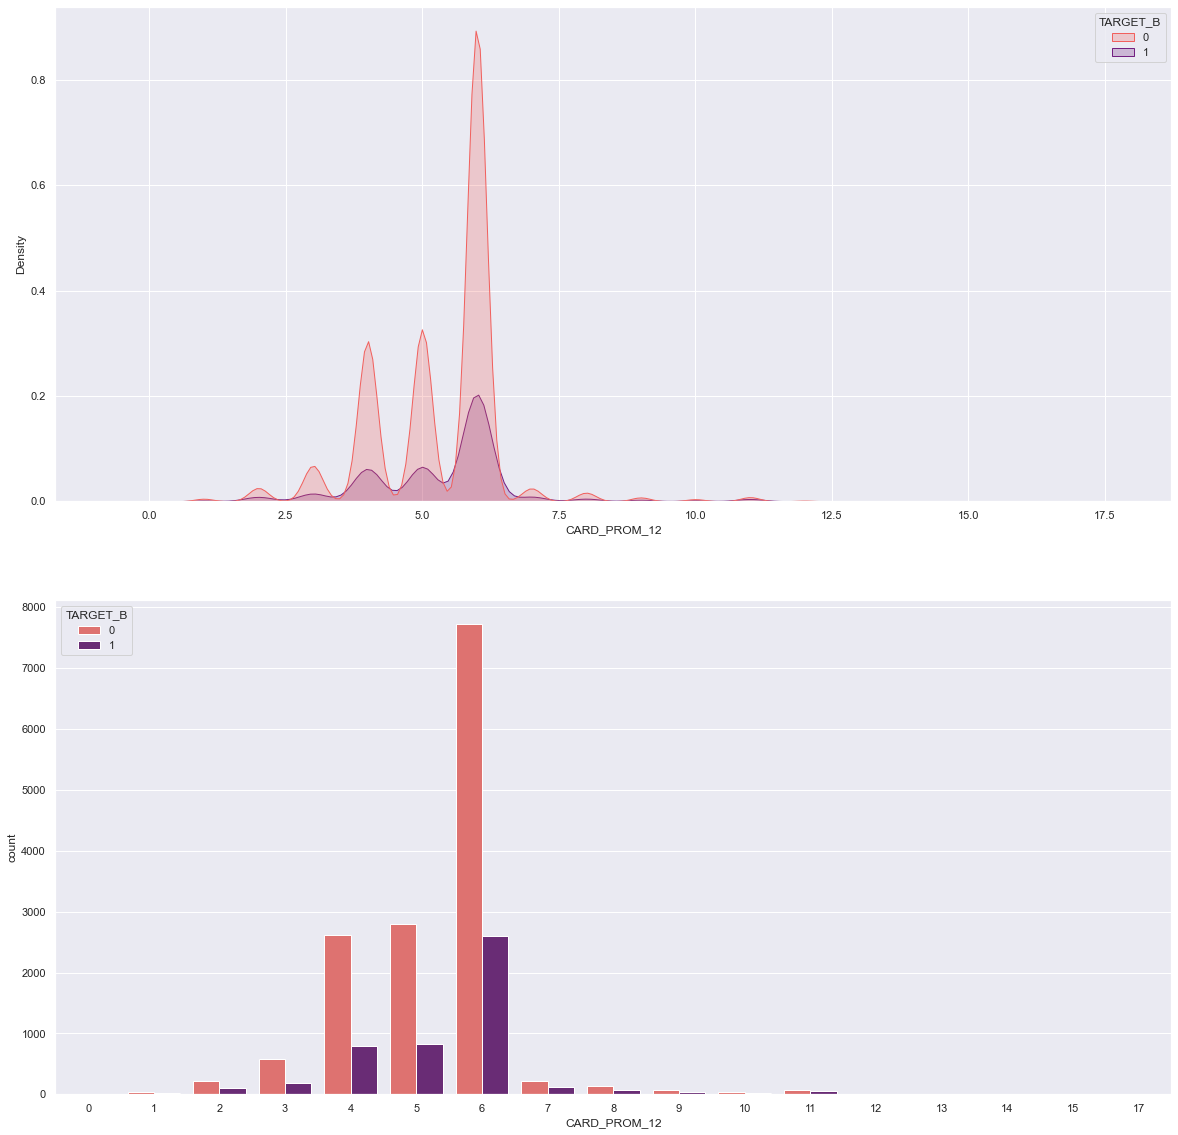

In [75]:
fig,ax = plt.subplots(2,1,figsize=(20, 20))
sns.kdeplot(x = training_data.CARD_PROM_12,ax = ax[0],hue = training_data.TARGET_B,shade=True,palette='magma_r')
sns.countplot(x = training_data.CARD_PROM_12,ax = ax[1],hue = training_data.TARGET_B,palette='magma_r')

*  **NUMBER_PROM_12**
        is there a trend between NUMBER_PROM_12 and the target ?

<AxesSubplot:xlabel='NUMBER_PROM_12', ylabel='count'>

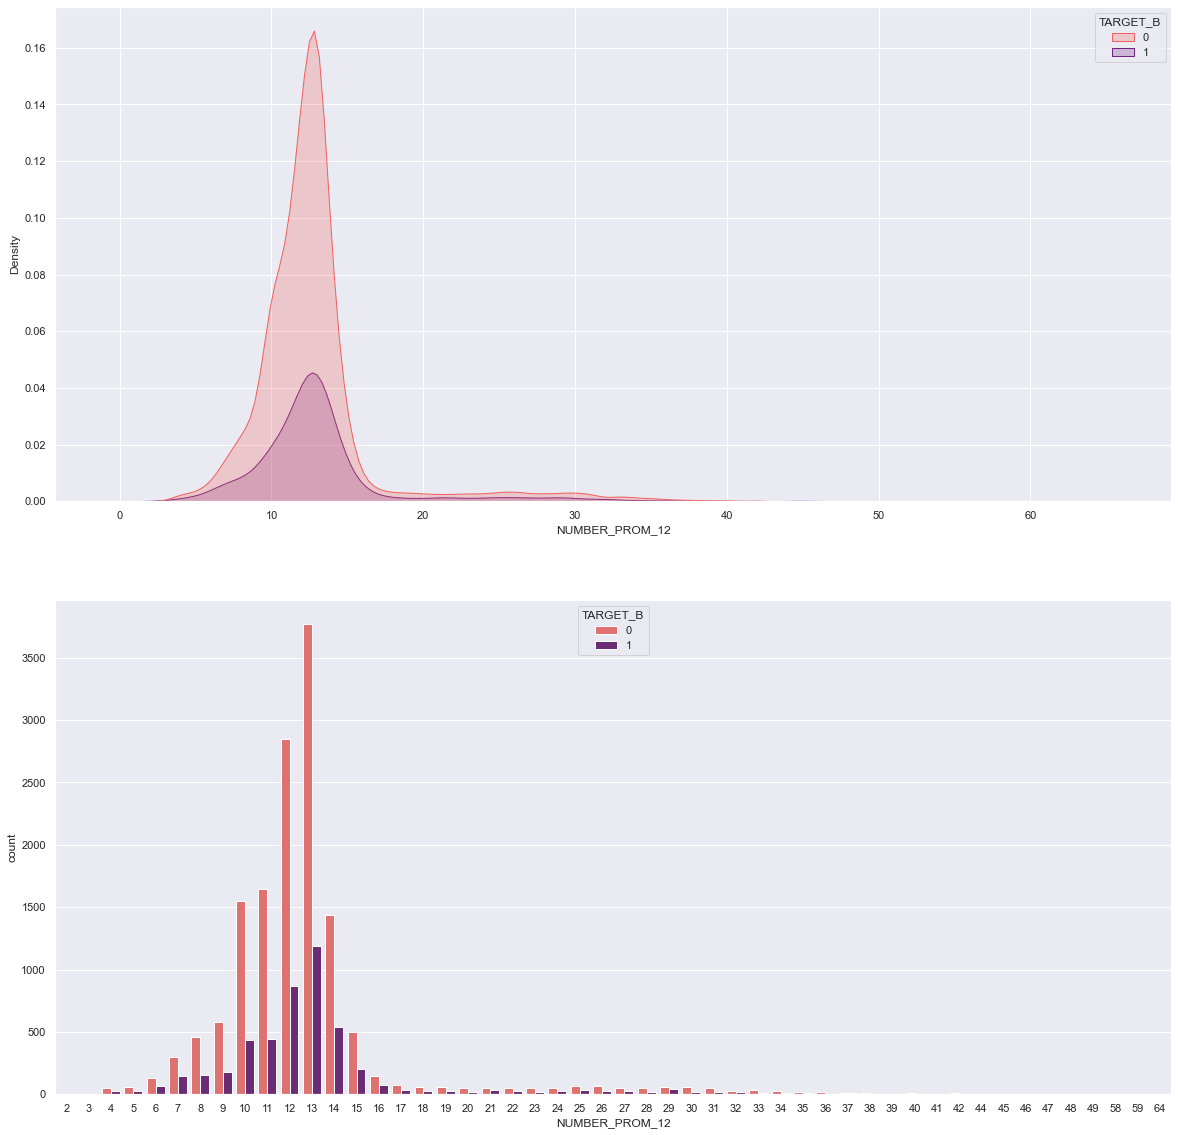

In [76]:
fig,ax = plt.subplots(2,1,figsize=(20, 20))
sns.kdeplot(x = training_data.NUMBER_PROM_12,ax = ax[0],hue = training_data.TARGET_B,shade=True,palette='magma_r')
sns.countplot(x = training_data.NUMBER_PROM_12,ax = ax[1],hue = training_data.TARGET_B,palette='magma_r')

*  **MONTHS_SINCE_LAST_GIFT**
        is there a trend between  MONTHS_SINCE_LAST_GIFT and the target ?

<AxesSubplot:xlabel='MONTHS_SINCE_LAST_GIFT', ylabel='count'>

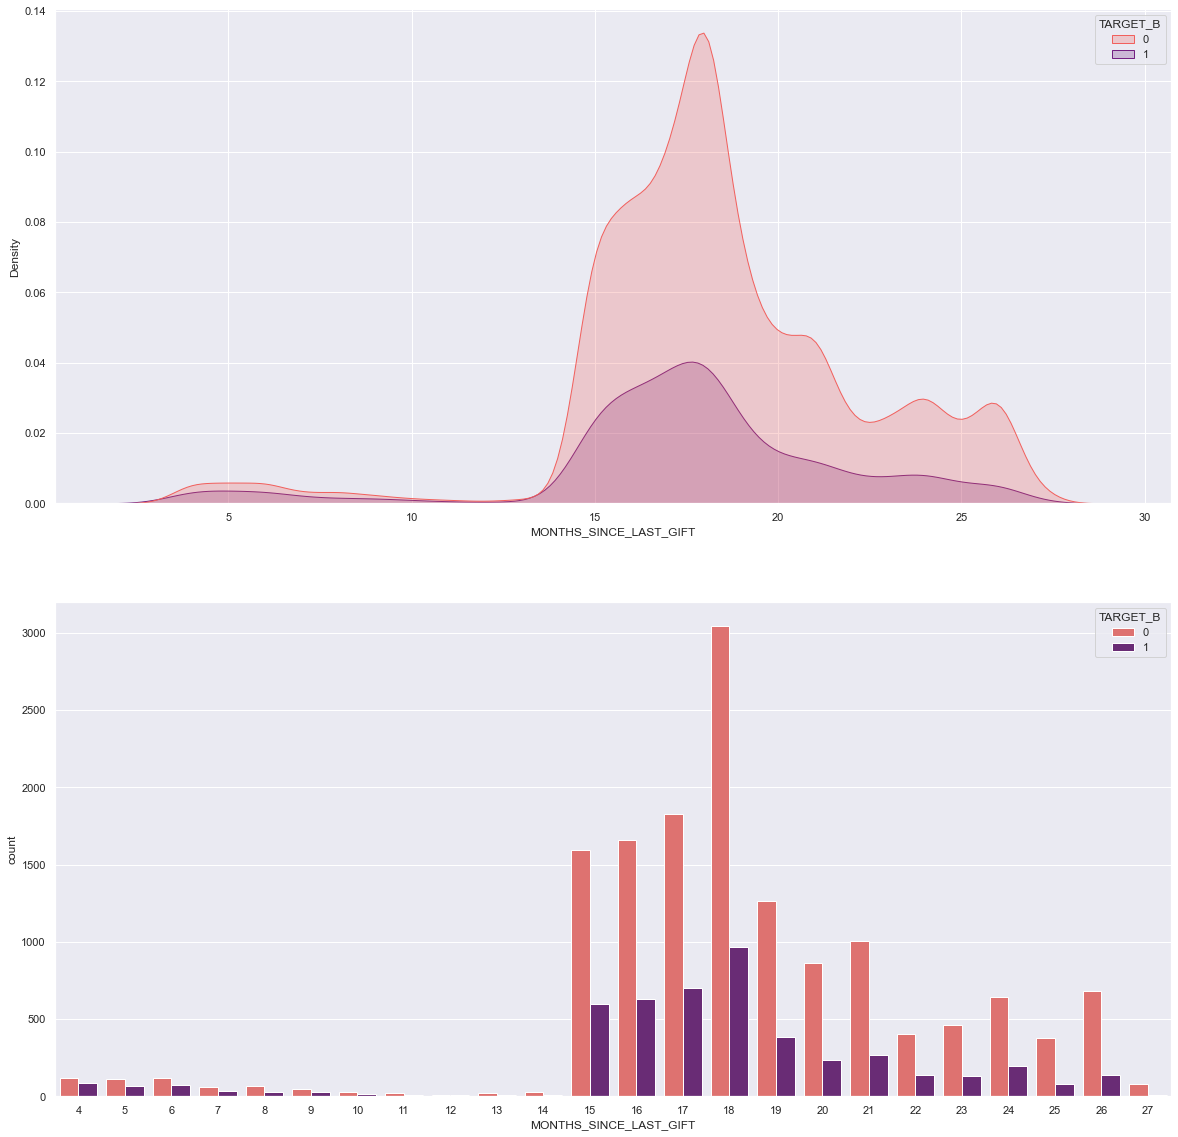

In [77]:
fig,ax = plt.subplots(2,1,figsize=(20, 20))
sns.kdeplot(x = training_data.MONTHS_SINCE_LAST_GIFT,ax = ax[0],hue = training_data.TARGET_B,shade=True,palette='magma_r')
sns.countplot(x = training_data.MONTHS_SINCE_LAST_GIFT,ax = ax[1],hue = training_data.TARGET_B,palette='magma_r')

*  **FILE_CARD_GIFT**
        is there a trend between  FILE_CARD_GIFT and the target ?


<AxesSubplot:xlabel='FILE_CARD_GIFT', ylabel='count'>

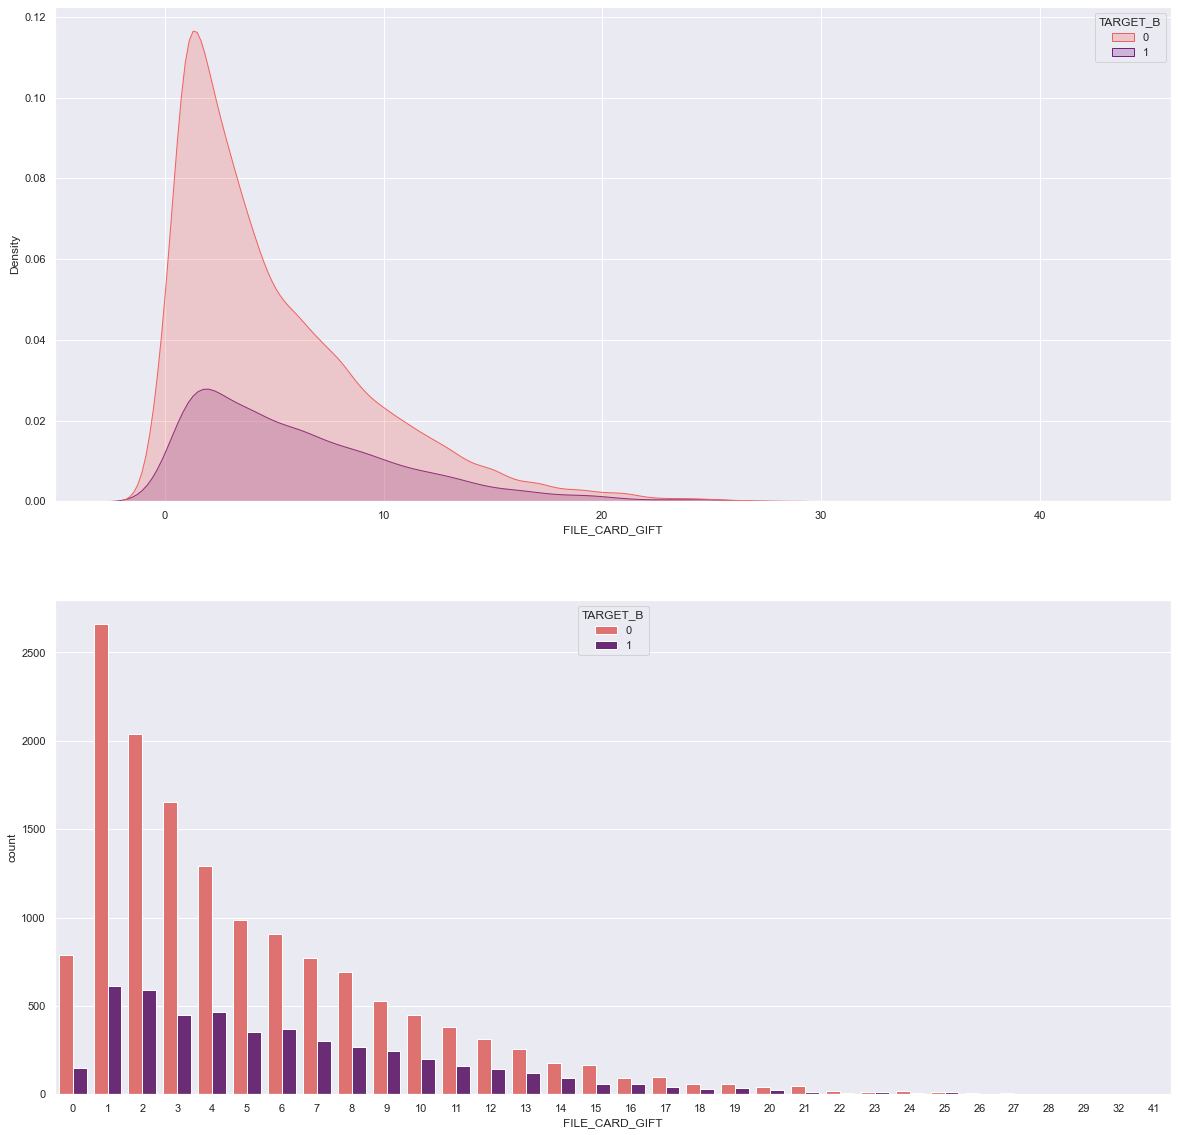

In [78]:
fig,ax = plt.subplots(2,1,figsize=(20, 20))
sns.kdeplot(x = training_data.FILE_CARD_GIFT,ax = ax[0],hue = training_data.TARGET_B,shade=True,palette='magma_r')
sns.countplot(x = training_data.FILE_CARD_GIFT,ax = ax[1],hue = training_data.TARGET_B,palette='magma_r')

In [79]:
cmap

# Exploring the relationship between the Numerical and the Target Column

*  **Correlation of Numerical Columns with the Target column**


<AxesSubplot:>

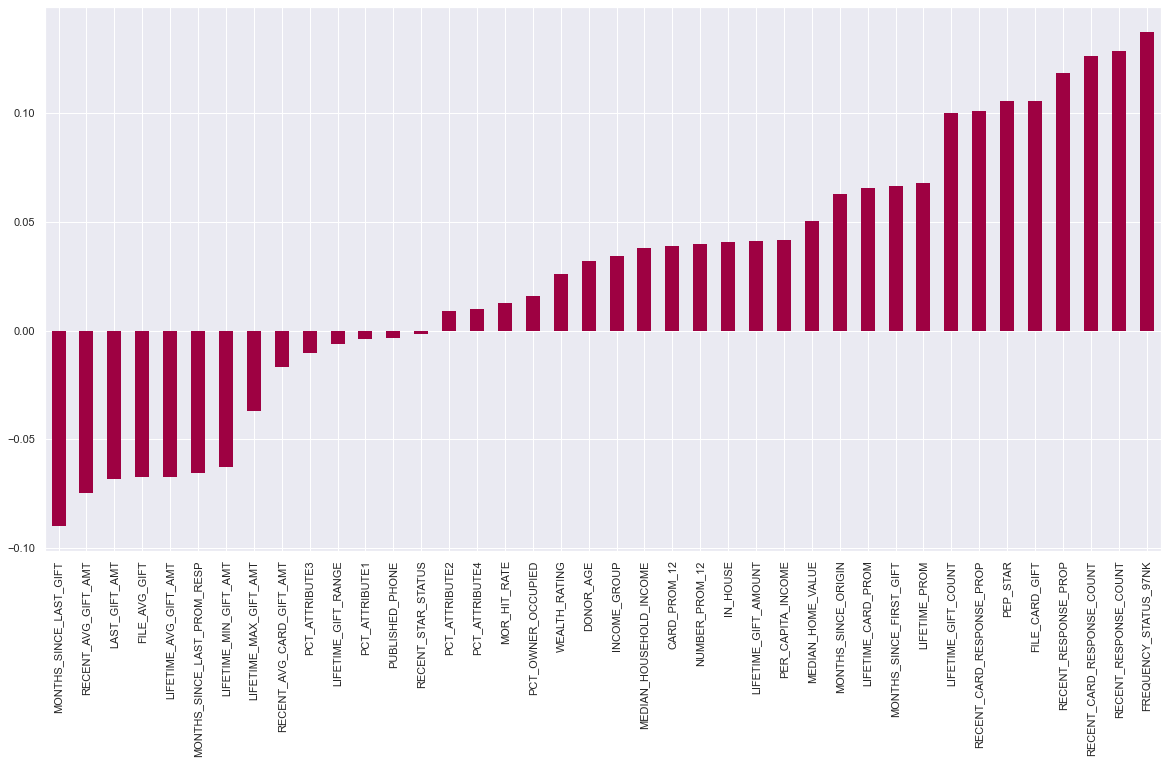

In [80]:
# lets get the correlation of the Numeric columns with the Target
correlation = training_data.corr()

fig = plt.figure(figsize=(20,10))
correlation.sort_values('TARGET_B').TARGET_B[:-1].plot(kind = 'bar', cmap=cmap, edgecolor='None')

*  **Correlation Matrix**


<AxesSubplot:>

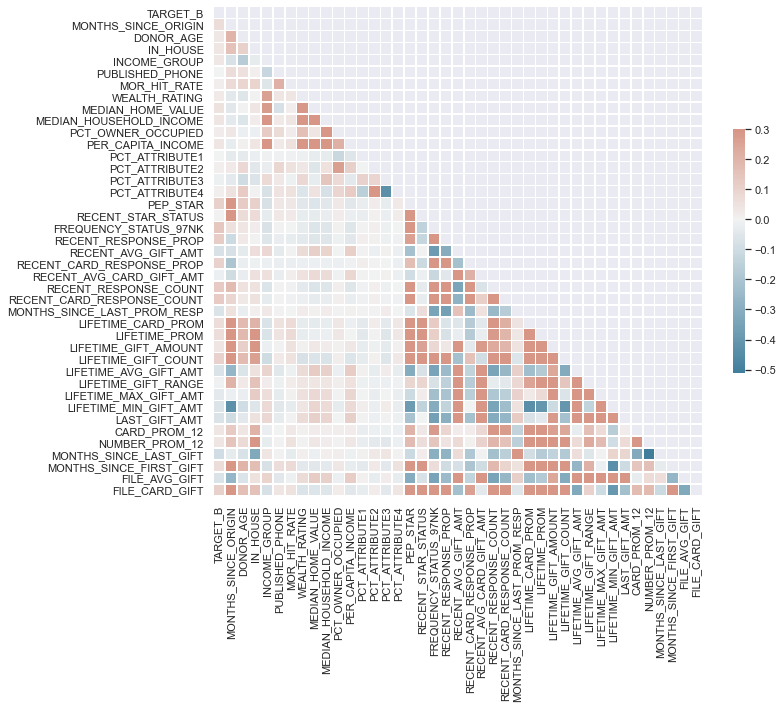

In [81]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [82]:
def numeric_variables_vs_target(data, numeric_variables, target, plot_width=15, plot_height=20):
        '''
        This method plots violin plots of specified numeric variables vs target variable.
        
        
        params:
        
        data: input data frame.
        
        numeric_variables: list containing numeric variable/column names of 'data'.
        
        target: string specifying the name of target variable.
        
        plot_width: width of pair plot, default value = 15.
        
        plot_height: height of pair plot, default value = 20.
        
        
        Returns: None.
        
        '''
        numeric_variables = numeric_variables.copy()
        data = data.copy()
        r = c = 0
        numeric_variables_length = len(numeric_variables)
        rows_in_plot = int(numeric_variables_length / 2) if (numeric_variables_length % 2 == 0) else (int(numeric_variables_length / 2) + 1)
        fig,ax = plt.subplots(rows_in_plot,2,figsize=(plot_width, plot_height))
        
        if rows_in_plot > 1:
            for n,i in enumerate(numeric_variables):
                med = data[[i,target]].groupby(target).median().copy()
                sns.violinplot(x=target,y=i,data=data,ax=ax[r,c],palette=["gray","lightgray"])
                med.plot(ax=ax[r,c],color='black',linewidth=3,linestyle="--",legend=False)
                for x,y in zip(list(med.index),med[i]):
                    ax[r,c].text(x=x+0.05,y=y+0.01,s=np.round(y,2),fontsize=10,color='white',backgroundcolor='black')
                ax[r,c].set_title(i.upper()+" by "+target)
                c+=1
                if (n+1)%2==0:
                    r+=1
                    c=0
            if (numeric_variables_length % 2) != 0:
                ax[r,c].axis("off")
        else:
            for n,i in enumerate(numeric_variables):
                med = data[[i,target]].groupby(target).median().copy()
                sns.violinplot(x=target,y=i,data=data,ax=ax[c],palette=["gray","lightgray"])
                med.plot(ax=ax[c],color='black',linewidth=3,linestyle="--",legend=False)
                for x,y in zip(list(med.index),med[i]):
                    ax[c].text(x=x+0.05,y=y+0.01,s=np.round(y,2),fontsize=10,color='white',backgroundcolor='black')
                ax[c].set_title(i.upper()+" by "+target)
                c+=1
                if (n+1)%2==0:
                    r+=1
                    c=0
            if numeric_variables_length == 1:
                ax[1].axis('off')
        plt.show()
        

# `Bivariate Analysis using Violin Plot`

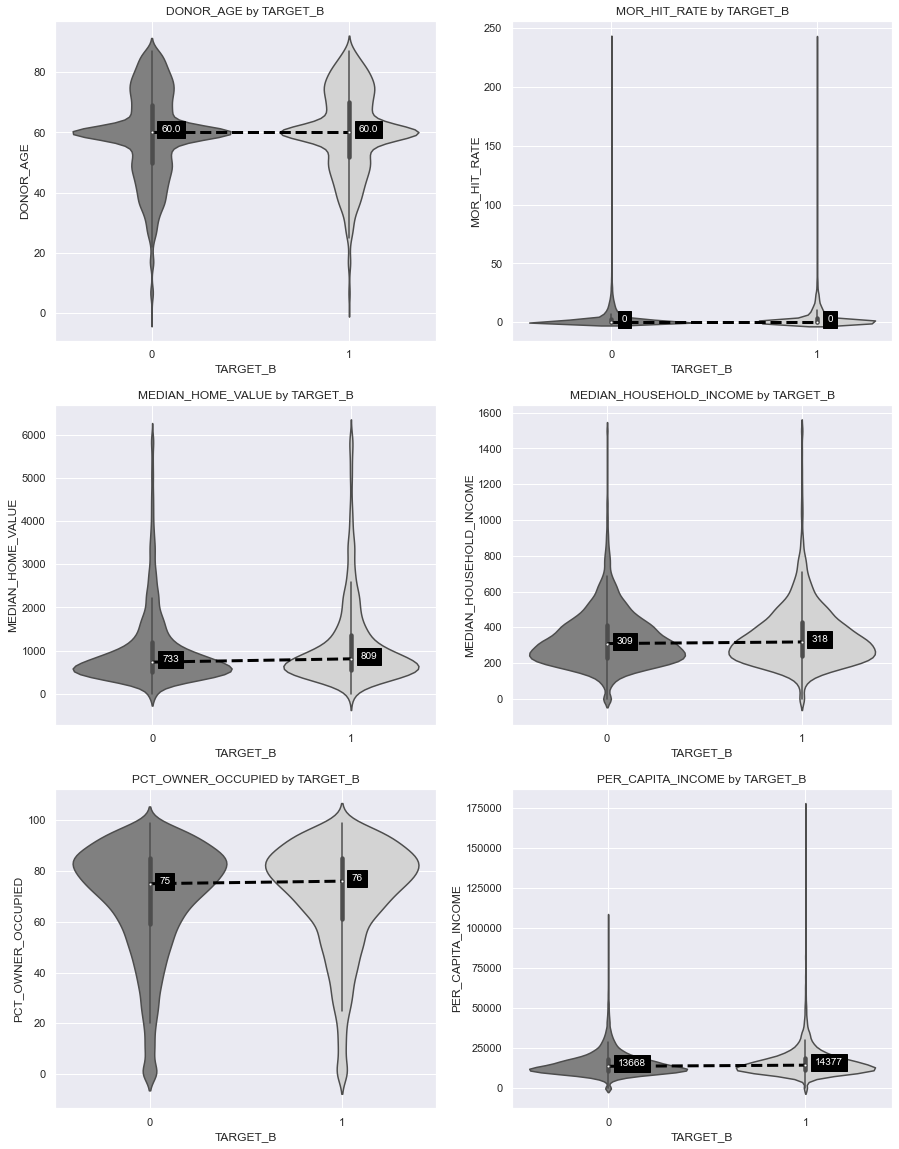

In [83]:
numeric_variables_vs_target(training_data, Numeric_columns[:6], 'TARGET_B')

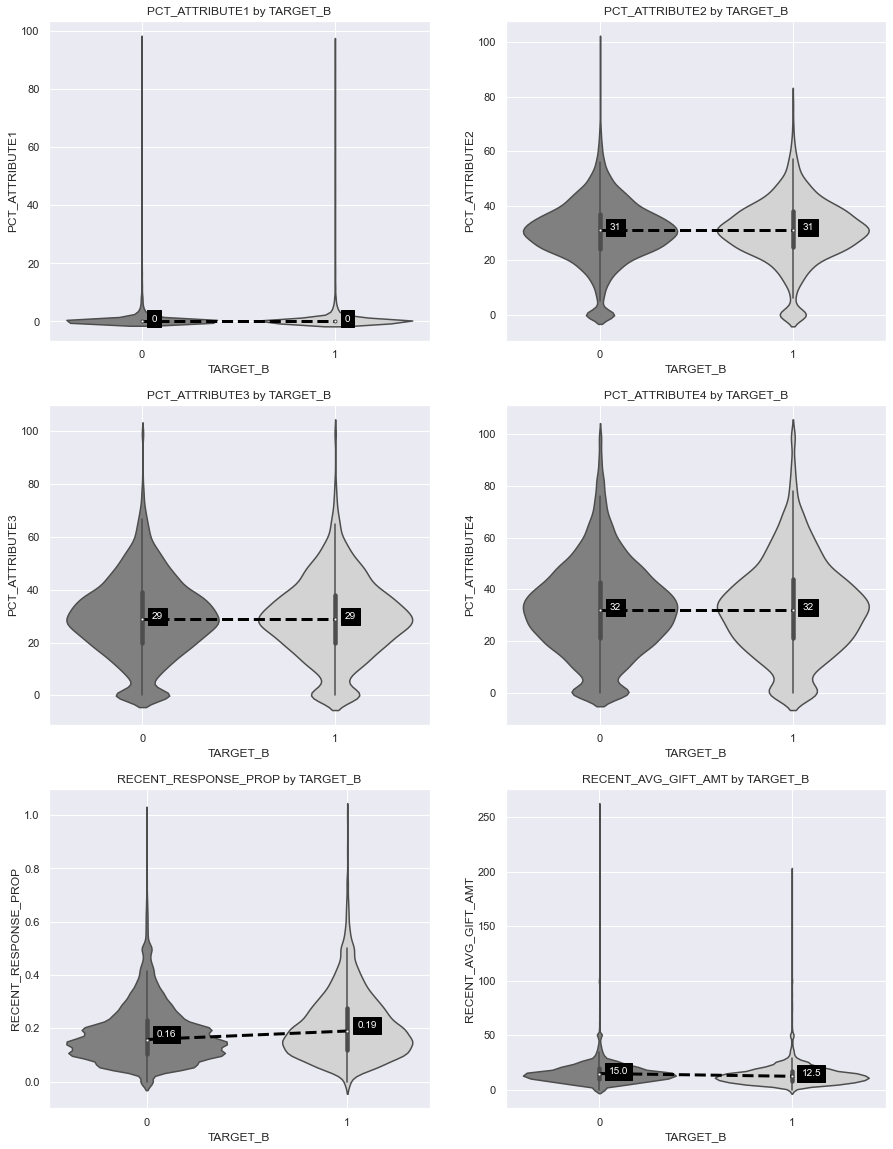

In [84]:
numeric_variables_vs_target(training_data, Numeric_columns[6:12], 'TARGET_B')

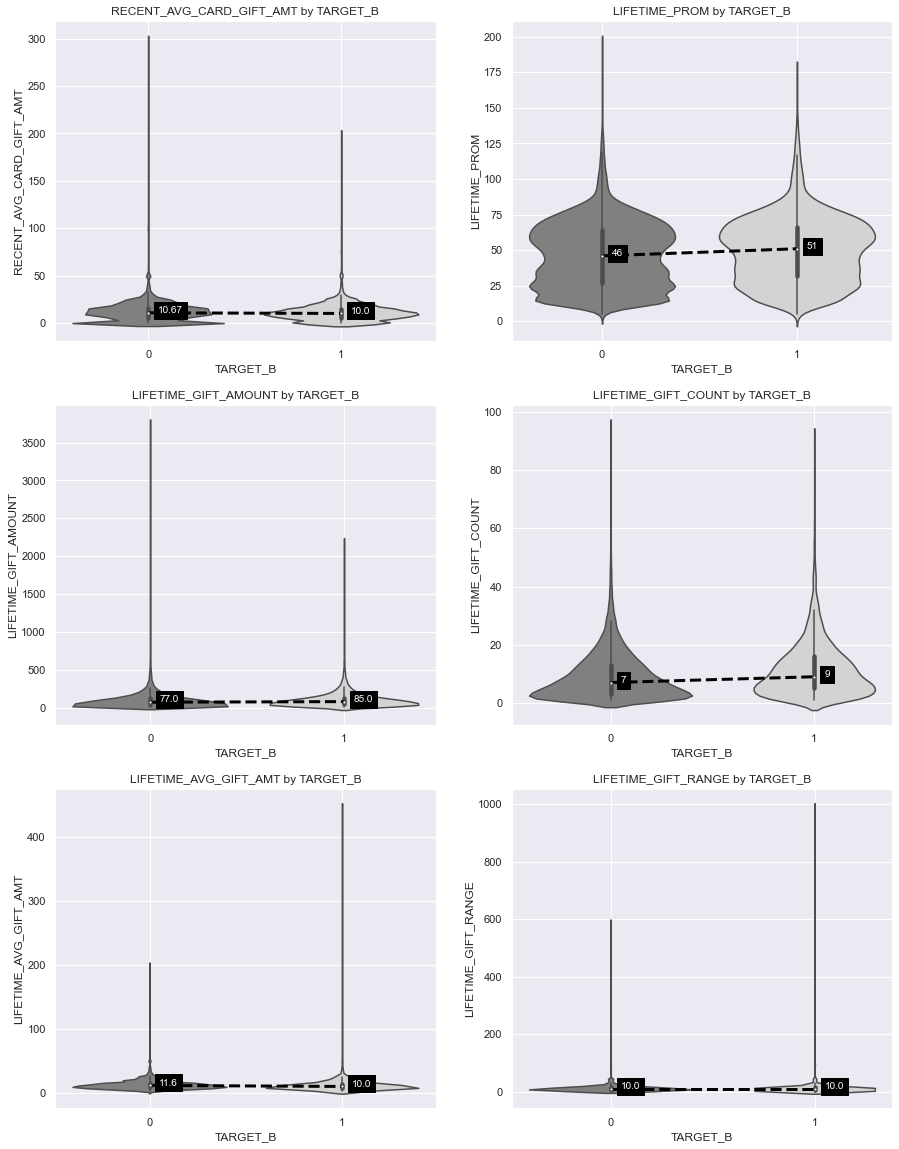

In [85]:
numeric_variables_vs_target(training_data, Numeric_columns[12:18], 'TARGET_B')

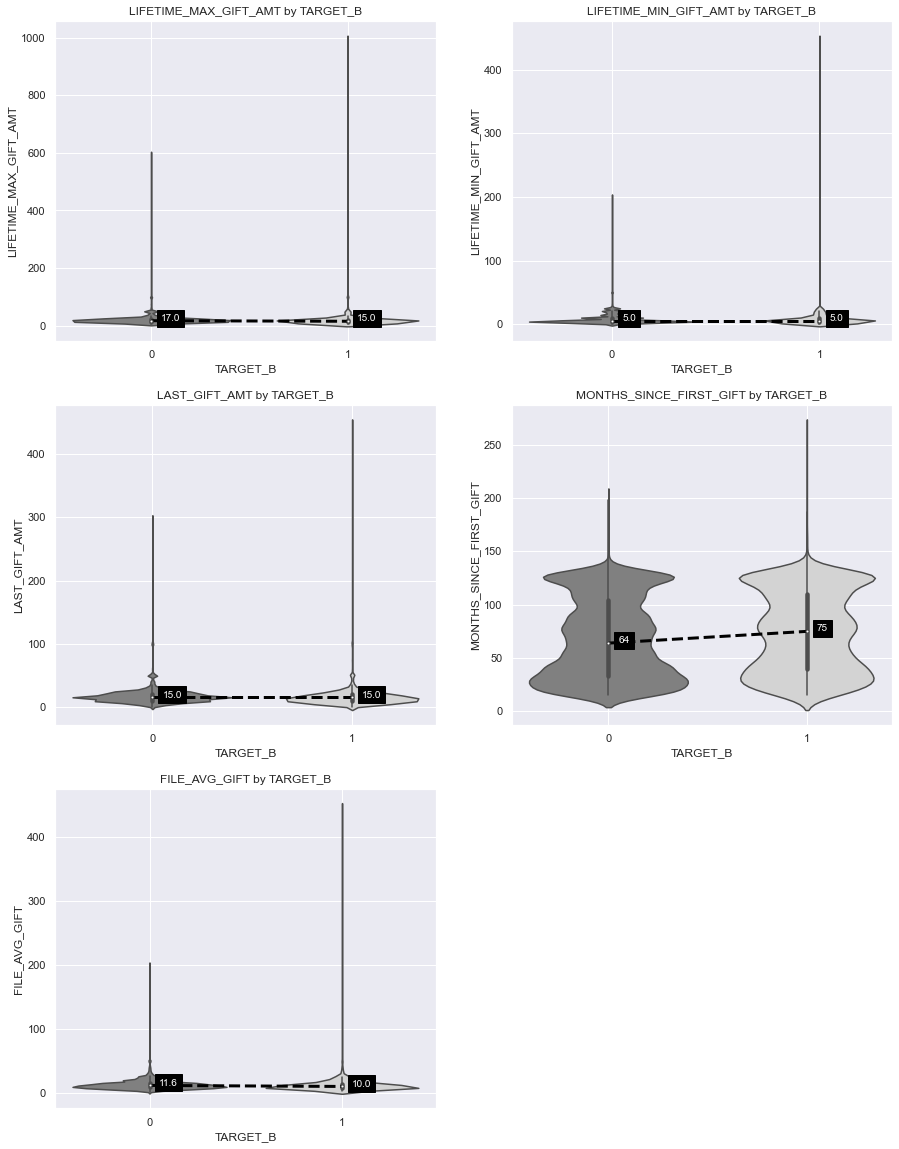

In [86]:
numeric_variables_vs_target(training_data, Numeric_columns[18:], 'TARGET_B')

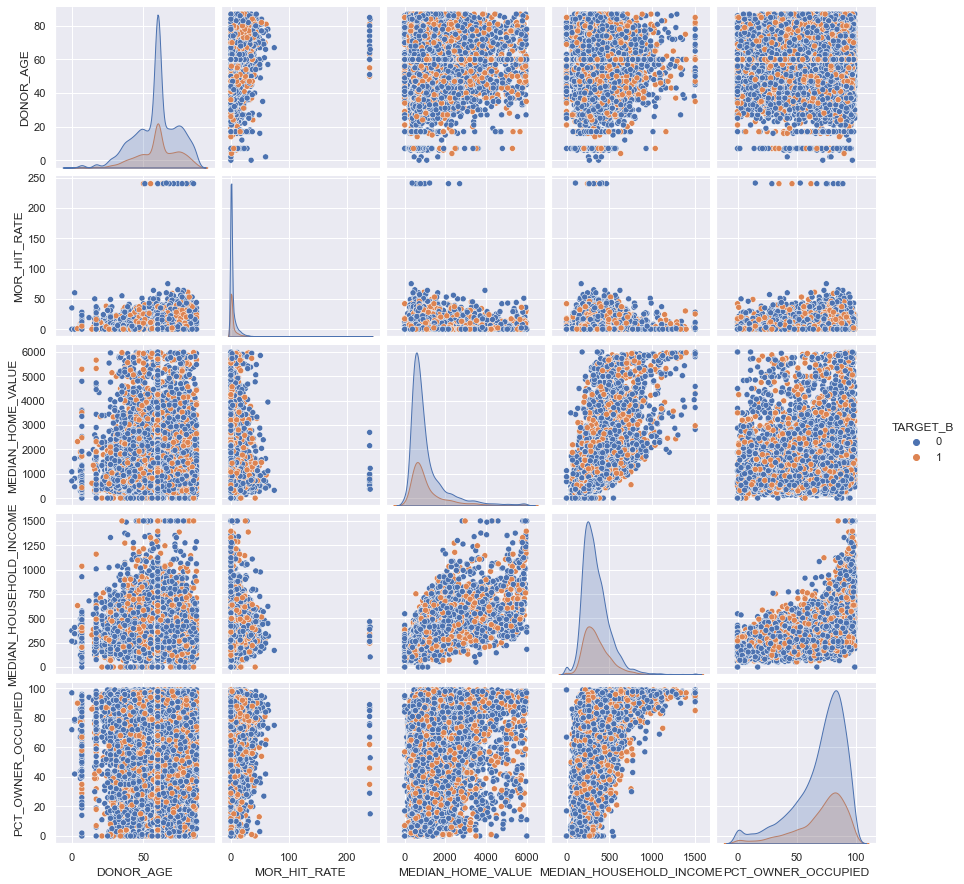

In [87]:
sns.pairplot(training_data, vars = Numeric_columns[:5], dropna = True,hue =  'TARGET_B')

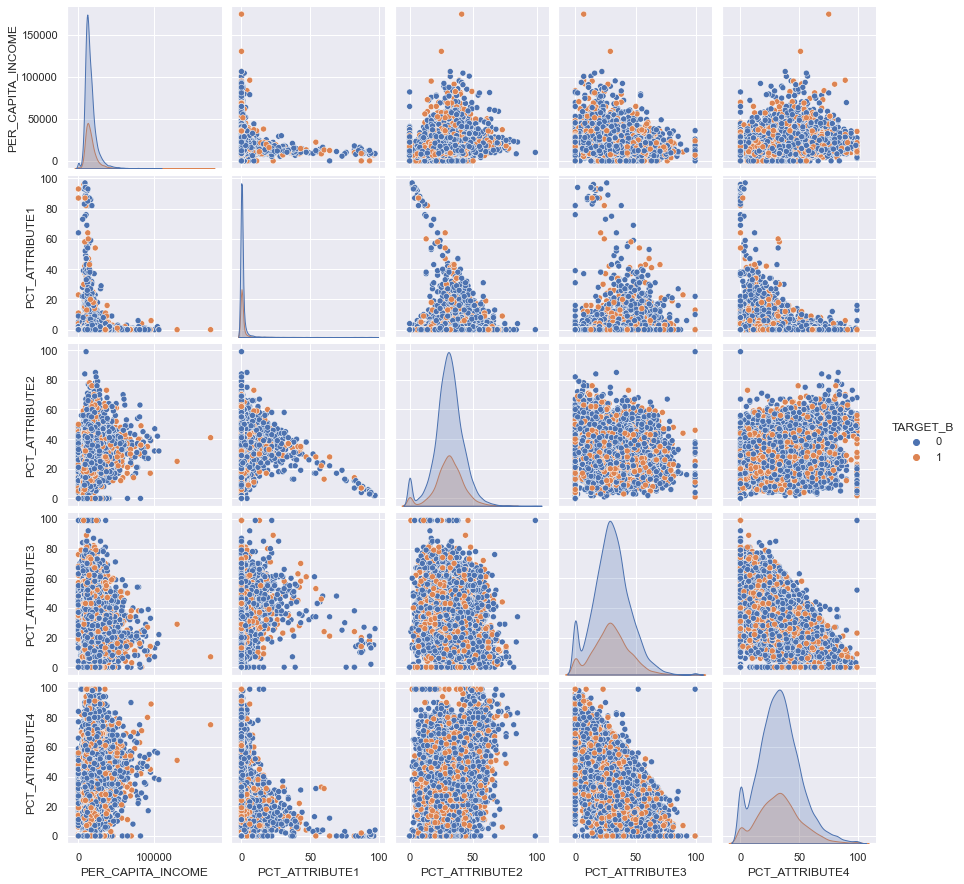

In [88]:
sns.pairplot(training_data, vars = Numeric_columns[5:10], dropna = True,hue =  'TARGET_B')

# `Modelling and Prediction`

* **lets check the shape of the Train and Test data**

In [89]:
training_data.shape,test_data.shape

((19372, 48), (2148, 47))

* **lets remove the Target Train set**

In [90]:
y=training_data['TARGET_B']
X=training_data.drop(['TARGET_B'],axis=1)

* **Joining the Train and Test data to process their categorical columns together**

In [91]:
total_data = pd.concat([X,test_data])

In [92]:
total_data.shape

(21520, 47)

In [93]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(Categorical_columns):
        total_data[i]=le.fit_transform(total_data[i])

* **Splitting the Train and Test data to after processing the categorical Columns**

In [94]:
X_train_cat_encoded =  total_data.iloc[:19372]
X_test_cat_encoded =  total_data.iloc[19372:]
X_train_cat_encoded.shape,X_test_cat_encoded.shape

((19372, 47), (2148, 47))

* **Splitting the Training  dataset into train and validation sets**

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_train_cat_encoded, y,test_size=0.2, random_state=42)

# Prediction 

*  **KNeighborsClassifier**


In [96]:

# define and configure the model
model = KNeighborsClassifier()
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))


Accuracy :  0.7050322580645161


*  **XGBClassifier**


In [97]:

# define and configure the model
model = XGBClassifier(random_state=43)
# fit the model
model.fit(X_train, y_train)
# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))


Accuracy :  0.7403870967741936


*  **RandomForestClassifier**


In [98]:
# define and configure the model
model = RandomForestClassifier(n_estimators=600,random_state=43)

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))


Accuracy :  0.7563870967741936


*  **CatBoostClassifier**


In [99]:
# define and configure the model
model = CatBoostClassifier(random_state=43,verbose=False)

# fit the model
model.fit(X_train, y_train)

# evaluate the model
preds = model.predict(X_test)
print('Accuracy : ',accuracy_score(y_test, preds))


Accuracy :  0.7566451612903226


* RandomForestClassifier is used for cross validation since it performed best on a single subset of the dataset

# `Cross validation to avoid overfitting`

*  **RandomForestClassifier Cross Validation**


In [ ]:
y__ =  y.copy()
total_test_set_prediction = []
kf = KFold(n_splits=5, random_state=False, shuffle=False)
for train_index, test_index in kf.split(X_train_cat_encoded):
    X_train, X_test = X_train_cat_encoded.iloc[train_index], X_train_cat_encoded.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model = RandomForestClassifier(n_estimators=600,random_state=43)

    # fit the model
    rf_model.fit(X_train, y_train)
    # evaluate the model
    preds = rf_model.predict(X_test)
    test_preds  = rf_model.predict(X_test_cat_encoded)
    total_test_set_prediction.append(test_preds)
    #arr = np.stack([arr,test_preds],1)
    y__.iloc[test_index] = preds
    print('k-fold Accuracy : ',accuracy_score(y_test, preds))
print('Cross_validation_Accuracy : ',accuracy_score(y__, y))
test_pred_array = np.array(total_test_set_prediction)
test_pred_array_T = test_pred_array.transpose()
final_test_pred  = mode(test_pred_array_T,1)[0]
final_test_pred = final_test_pred.reshape((-1))

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


k-fold Accuracy :  0.736516129032258
k-fold Accuracy :  0.7729032258064517
k-fold Accuracy :  0.7792978833247289
k-fold Accuracy :  0.7483221476510067


In [ ]:
PREDICTED_df = pd.DataFrame()
PREDICTED_df['TARGET_B'] = final_test_pred
PREDICTED_df['CONTROL_NUMBER'] = test_control_no
PREDICTED_df.head()

In [ ]:
PREDICTED_df.TARGET_B.value_counts()

# `saving the predicted donors`

In [ ]:
PREDICTED_df.to_csv('predicted_donors.csv',index = False)